<a href="https://colab.research.google.com/github/malakmlk/Connect_4_RL/blob/main/heurstic_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [4]:
class ConnectFourEnv:
    def __init__(self, rows=6, cols=7):
        self.rows = rows
        self.cols = cols
        self.board = np.zeros((rows, cols))
        self.players = [1, 2]
        self.current_player = random.choice(self.players)
        self.num_moves = 0
        self.max_moves = rows * cols

    def reset(self):
        self.board = np.zeros((self.rows, self.cols))
        self.current_player = random.choice(self.players)
        self.num_moves = 0

    def get_valid_moves(self):
        return [col for col in range(self.cols) if self.board[0][col] == 0]

    def step(self, action):
        row = 0
        while row < self.rows - 1 and self.board[row + 1][action] == 0:
            row += 1
        self.board[row][action] = self.current_player
        self.num_moves += 1
        done = self.is_win(row, action) or self.num_moves >= self.max_moves
        reward = 1 if self.is_win(row, action) else 0
        if not done:
            self.current_player = self.players[0] if self.current_player == self.players[1] else self.players[1]
        return self.board.copy(), reward, done, {}

    def is_win(self, row, col):
        player = self.board[row][col]
        # check vertical
        if row >= 3 and np.all(self.board[row-3:row+1, col] == player):
            return True
        # check horizontal
        if np.any([np.all(self.board[row, col:col+4] == player) for col in range(self.cols - 3)]):
            return True
        # check diagonal
        if (col >= 3 and row >= 3 and
            np.all(np.diag(self.board[row-3:row+1, col-3:col+1]) == player)):
            return True
        if (col >= 3 and row <= self.rows - 4 and
            np.all(np.diag(np.flipud(self.board[row:row+4, col-3:col+1])) == player)):
            return True
        return False

    def render(self):
        fig, ax = plt.subplots(figsize=(7, 6))
        # Color map: 0 for empty, 1 for player 1 (red), 2 for player 2 (yellow)
        cmap = plt.cm.colors.ListedColormap(['white', 'red', 'yellow'])
        ax.imshow(self.board, cmap=cmap, vmin=0, vmax=2)

        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels([str(i) for i in range(self.cols)])
        ax.set_yticklabels([str(i) for i in range(self.rows)])
        ax.set_title("Connect Four Game")
        plt.colorbar(ax.imshow(self.board, cmap=cmap, vmin=0, vmax=2), ax=ax)
        plt.show()




In [10]:
# Simple Agent that picks a random valid move
class RandomAgent:
    def __init__(self, player_id):
        self.player_id = player_id

    def get_action(self, env):
        valid_moves = env.get_valid_moves()
        return random.choice(valid_moves)


Tour du joueur 1


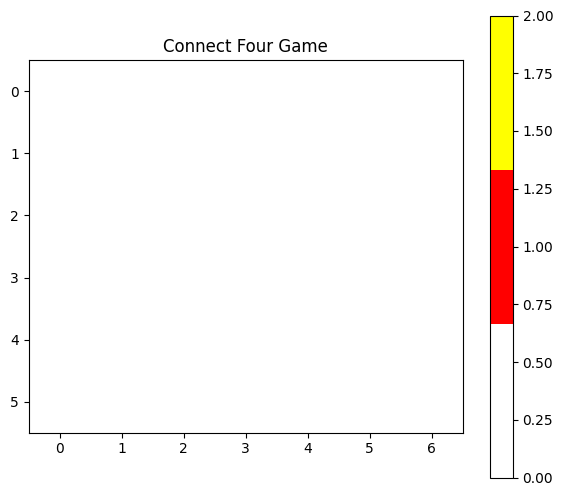

Coup joué: 4


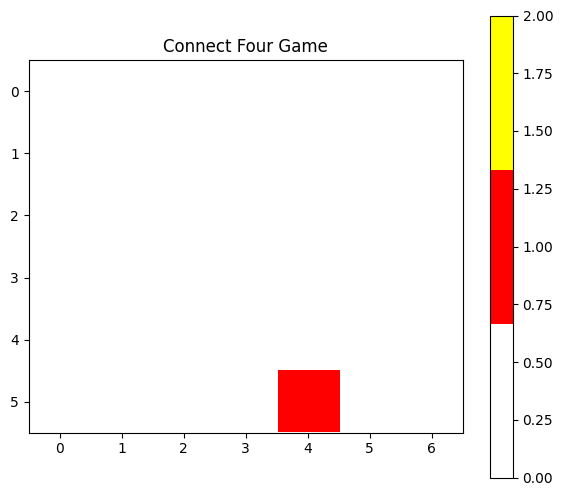


Tour du joueur 2


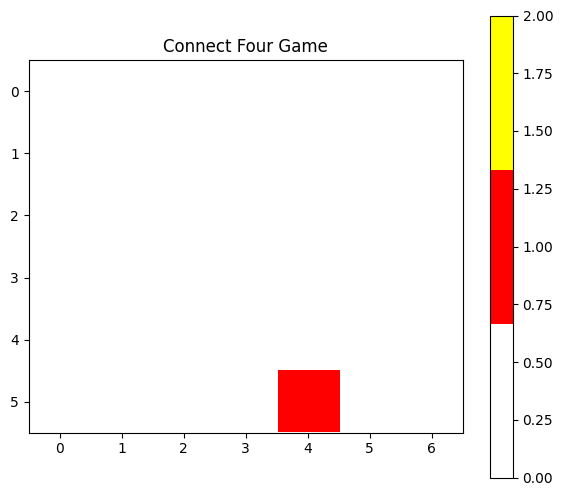

Coup joué: 4


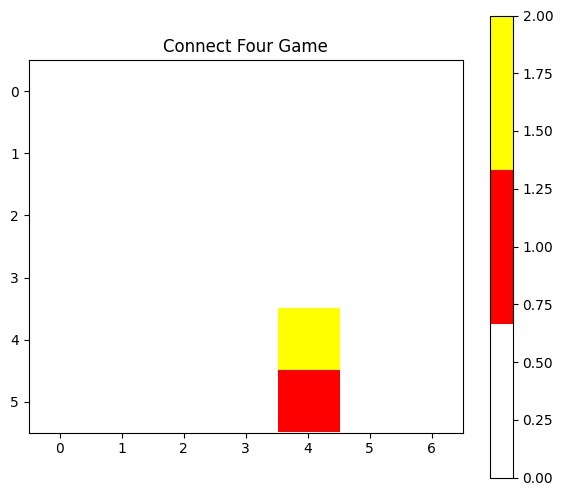


Tour du joueur 1


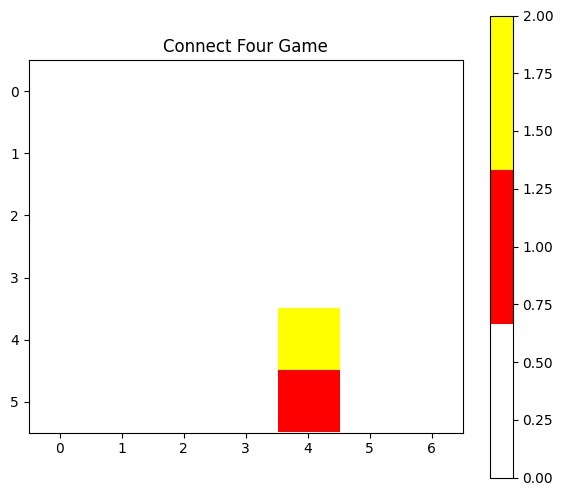

Coup joué: 2


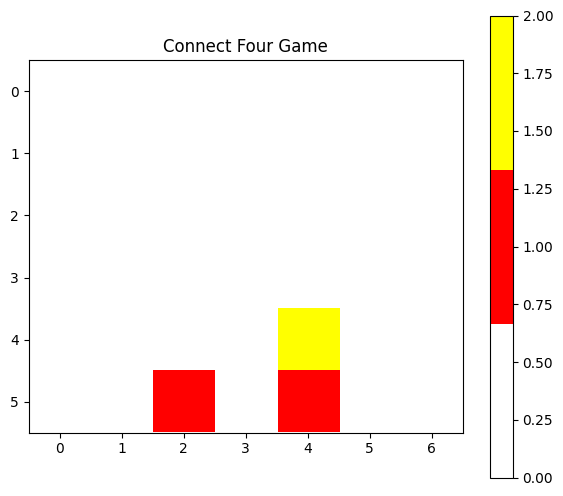


Tour du joueur 2


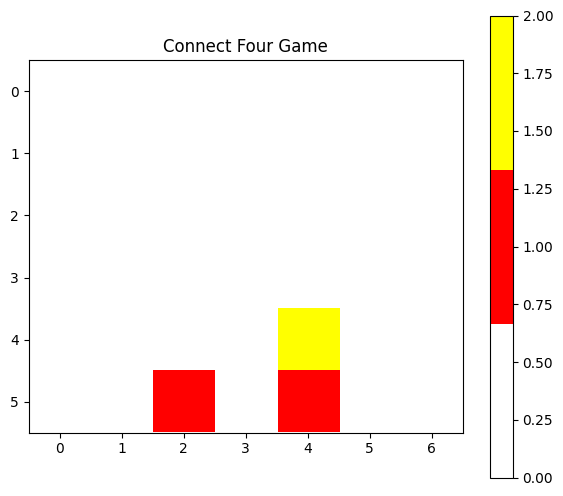

Coup joué: 6


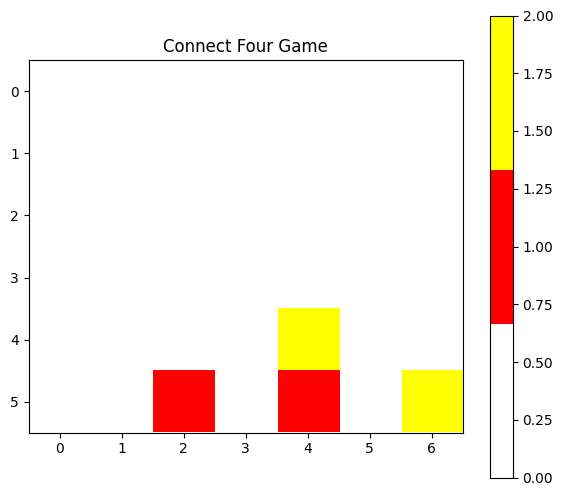


Tour du joueur 1


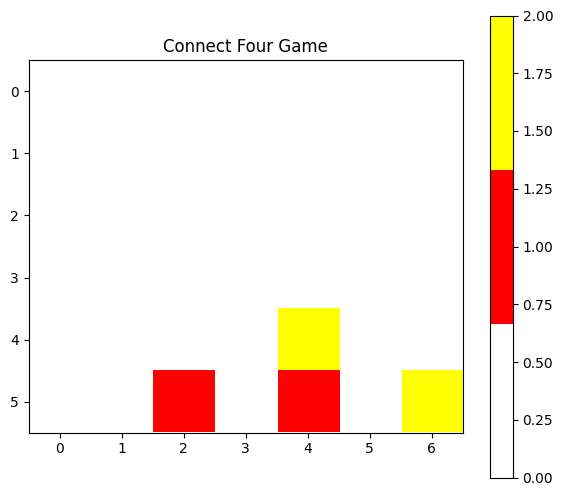

Coup joué: 1


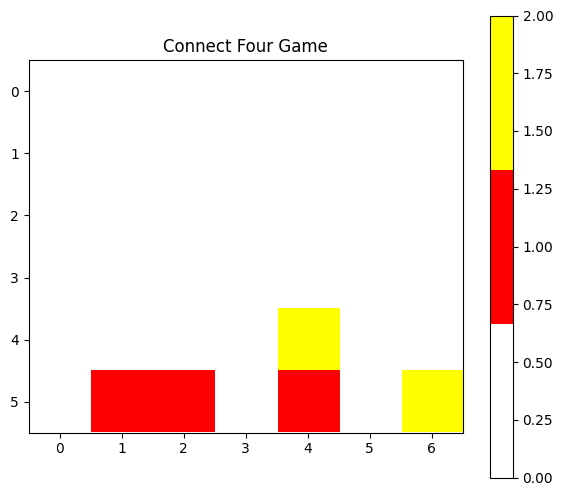


Tour du joueur 2


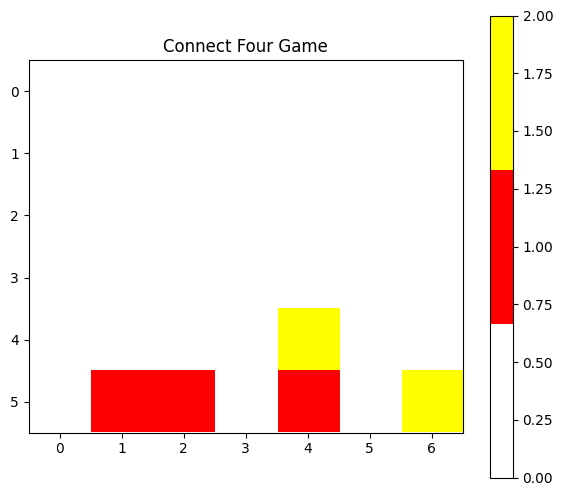

Coup joué: 3


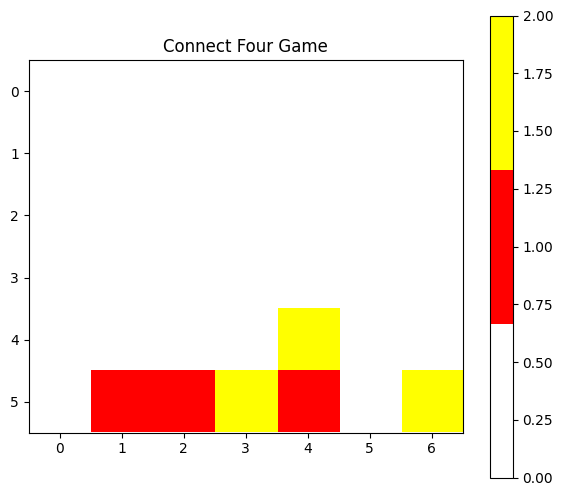


Tour du joueur 1


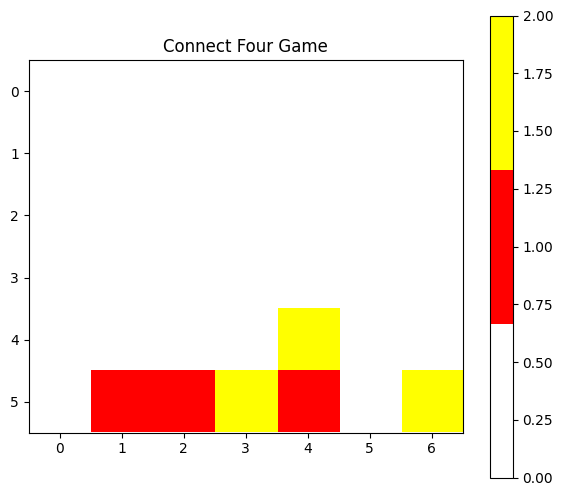

Coup joué: 5


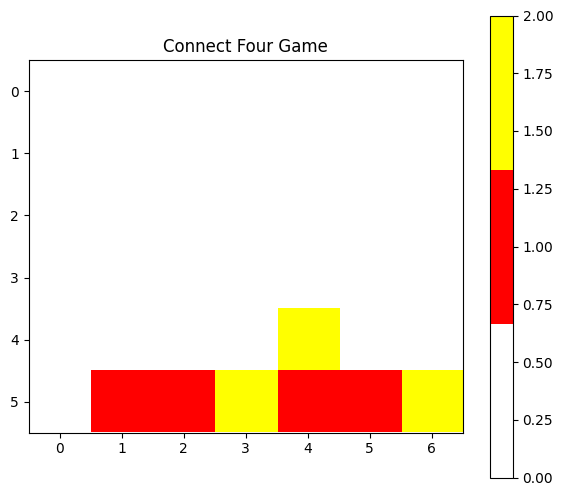


Tour du joueur 2


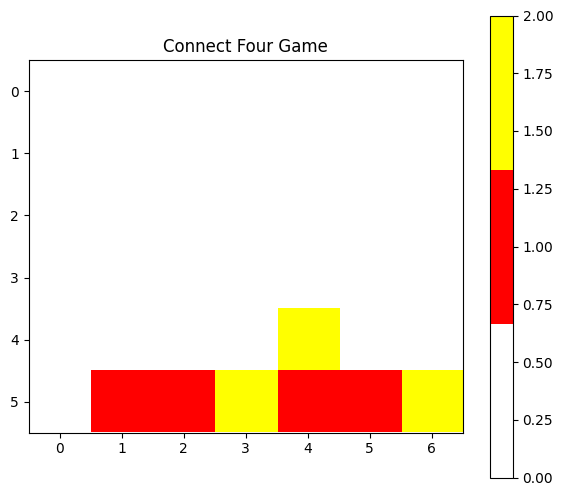

Coup joué: 0


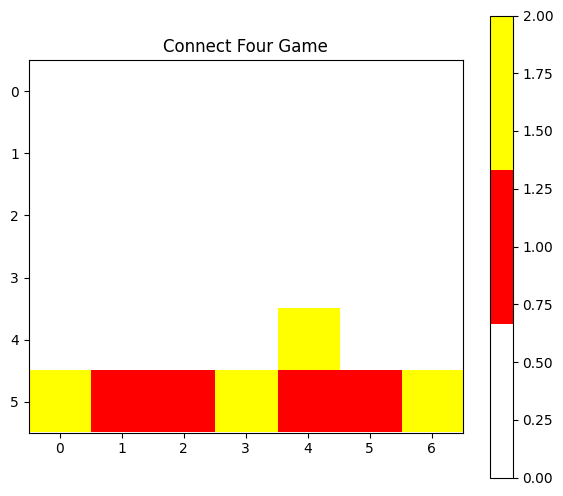


Tour du joueur 1


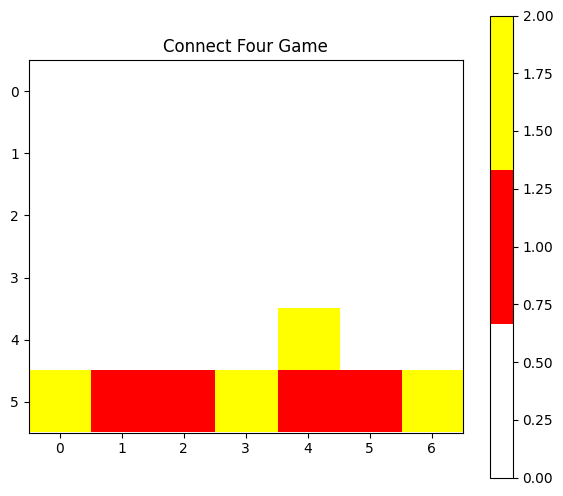

Coup joué: 1


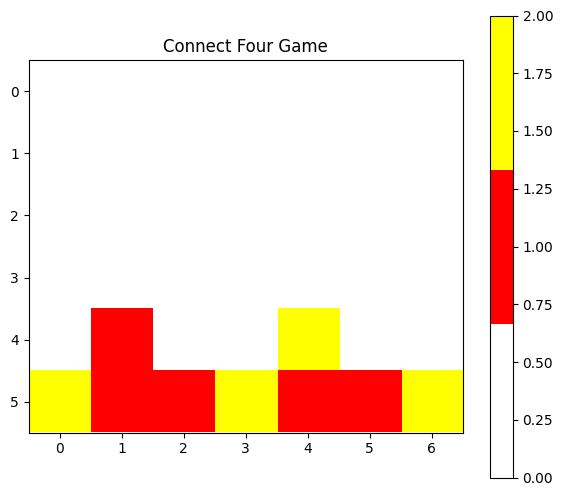


Tour du joueur 2


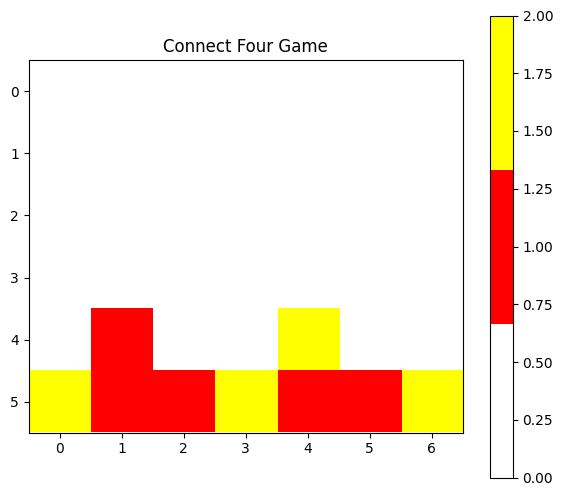

Coup joué: 6


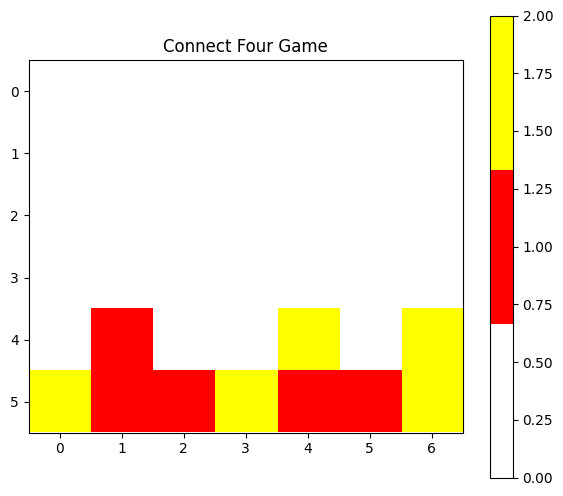


Tour du joueur 1


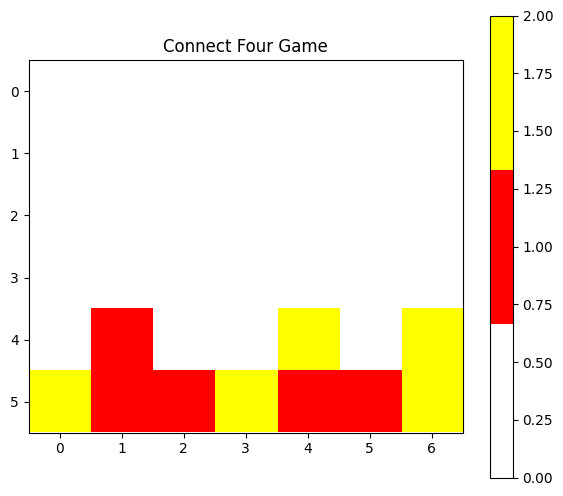

Coup joué: 1


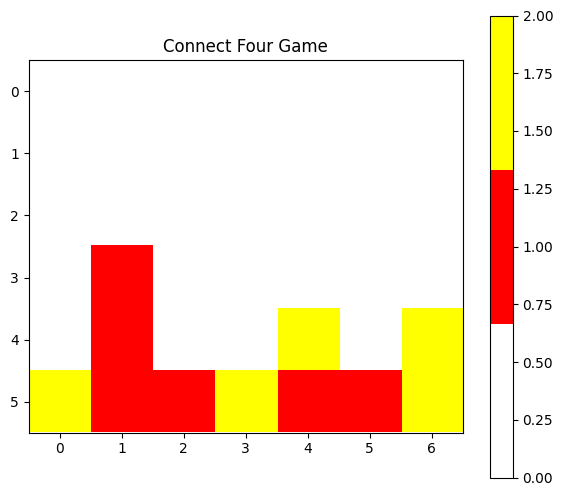


Tour du joueur 2


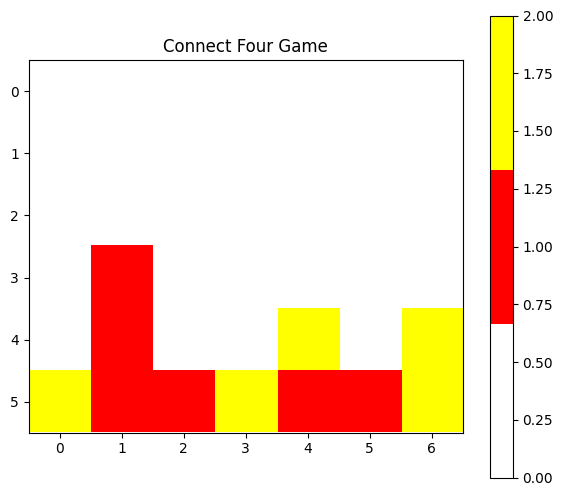

Coup joué: 5


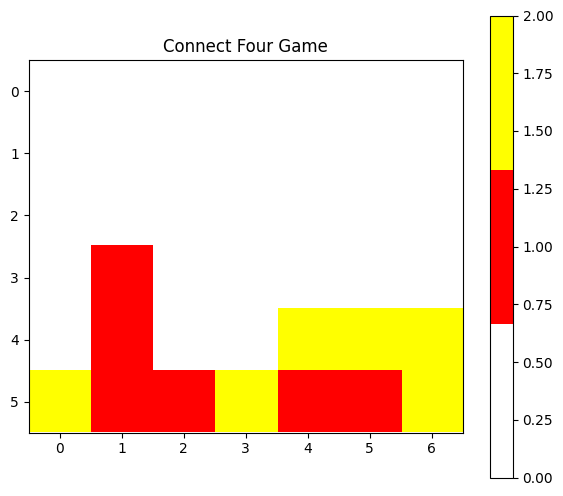


Tour du joueur 1


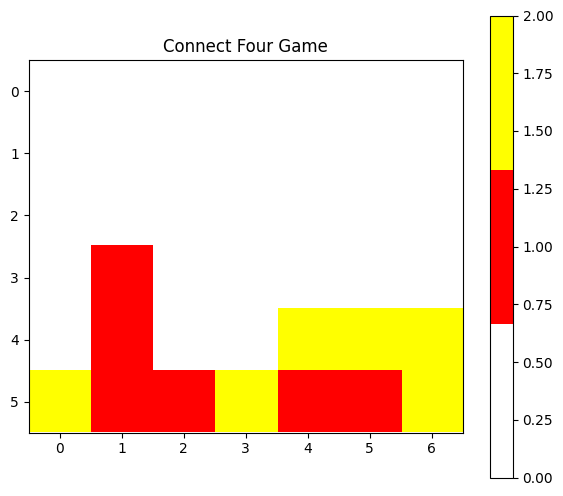

Coup joué: 2


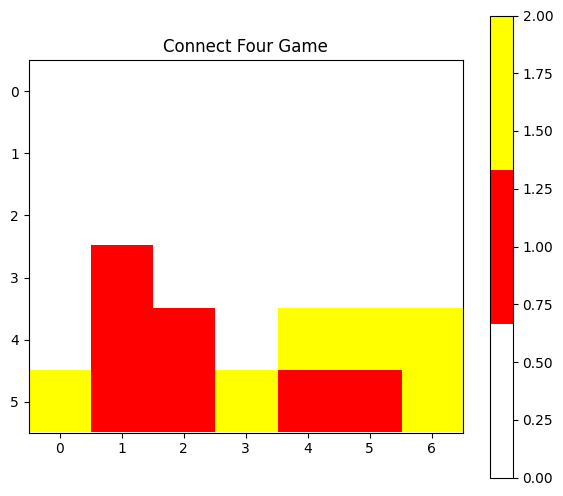


Tour du joueur 2


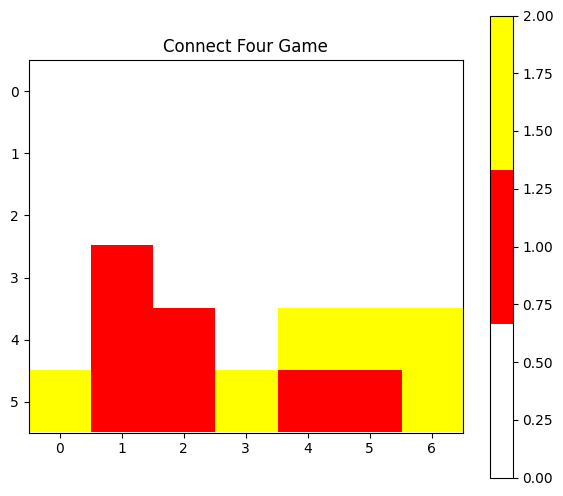

Coup joué: 3


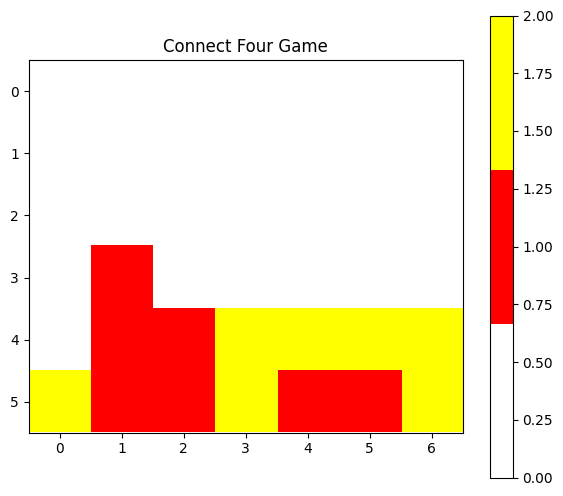

Le joueur 2 a gagné!


In [11]:
# Fonction pour jouer une partie complète entre deux joueurs (un agent aléatoire et un autre joueur)
agent1 = RandomAgent(player_id=1)
agent2 = RandomAgent(player_id=2)

def play_game(agent1, agent2):
    env = ConnectFourEnv()
    env.reset()
    done = False
    turn = 0

    while not done:
        current_player = env.players[turn % 2]
        print(f"\nTour du joueur {current_player}")
        env.render()

        # Choisir un coup aléatoire parmi les coups valides pour l'agent
        valid_moves = env.get_valid_moves()
        if current_player == 1:
            move = agent1.get_action(env)
        else:
            move = agent2.get_action(env)

        # Appliquer le coup et obtenir l'état du jeu après le tour
        new_board, reward, done, _ = env.step(move)

        # Afficher le plateau après le coup
        print(f"Coup joué: {move}")
        env.render()

        # Vérifier le résultat du jeu
        if done:
            if reward == 1:
                print(f"Le joueur {current_player} a gagné!")
            else:
                print("Match nul!")
            break

        turn += 1

# Lancer une simulation complète de la partie avec deux agents aléatoires
play_game(agent1, agent2)


Tour du joueur 1


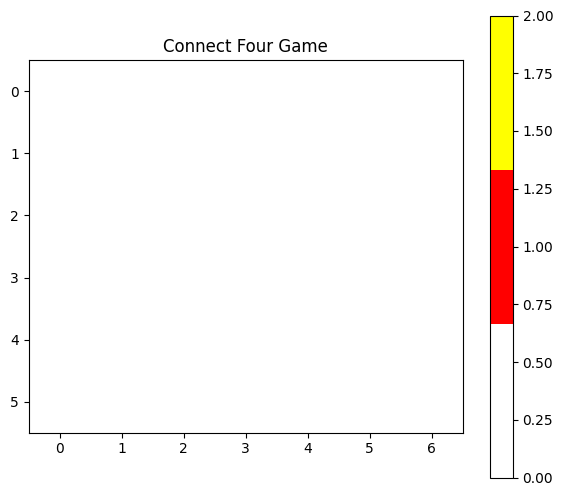

Coup joué: 6


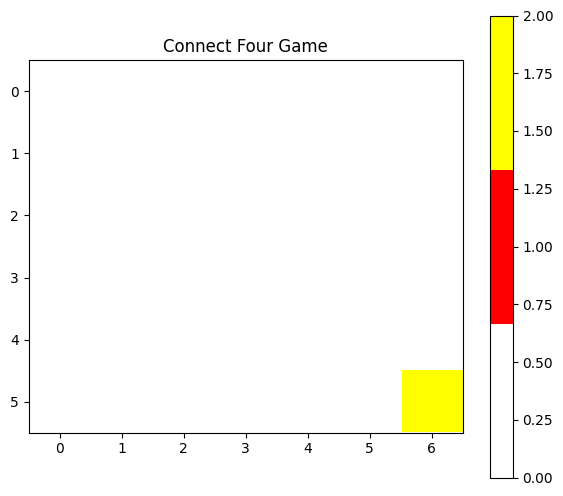


Tour du joueur 2


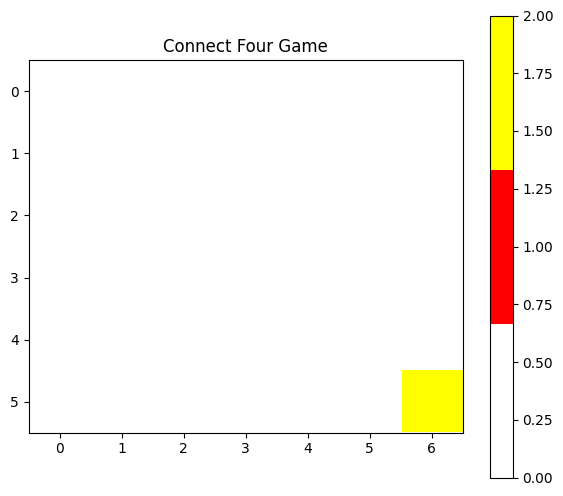

Coup joué: 2


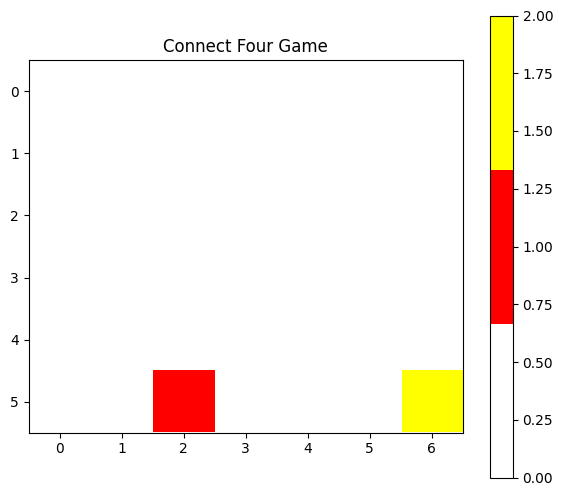


Tour du joueur 1


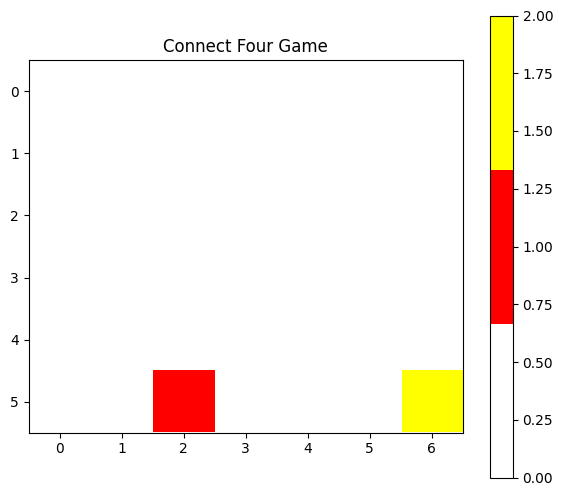

Coup joué: 2


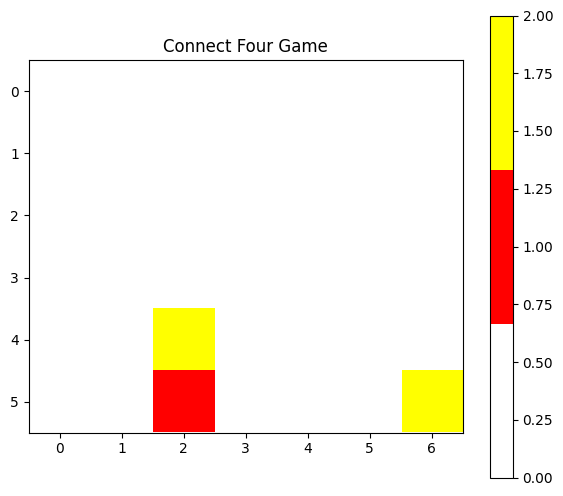


Tour du joueur 2


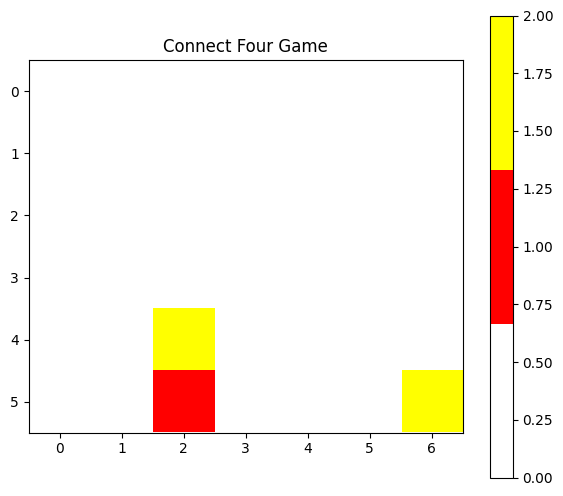

Coup joué: 0


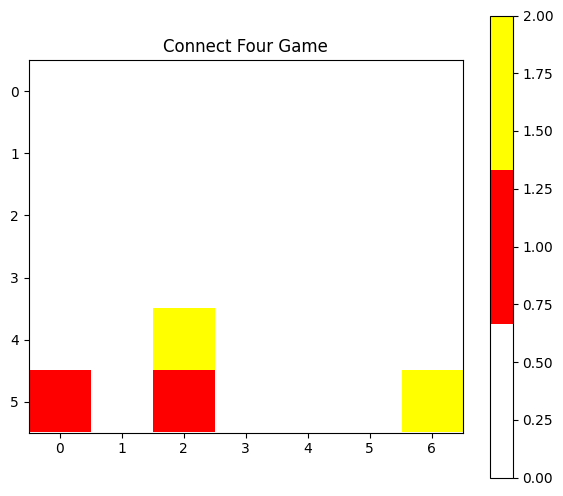


Tour du joueur 1


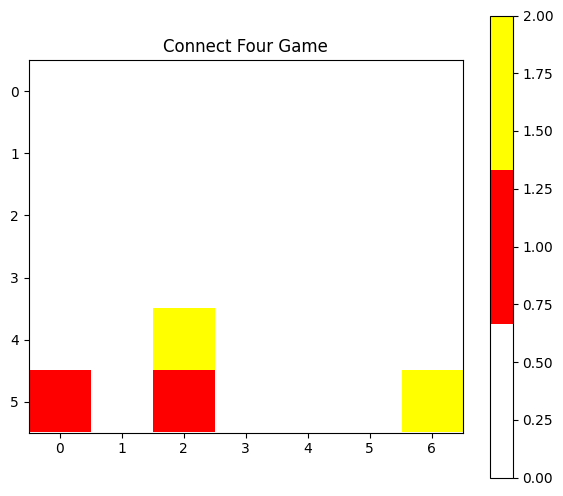

Coup joué: 6


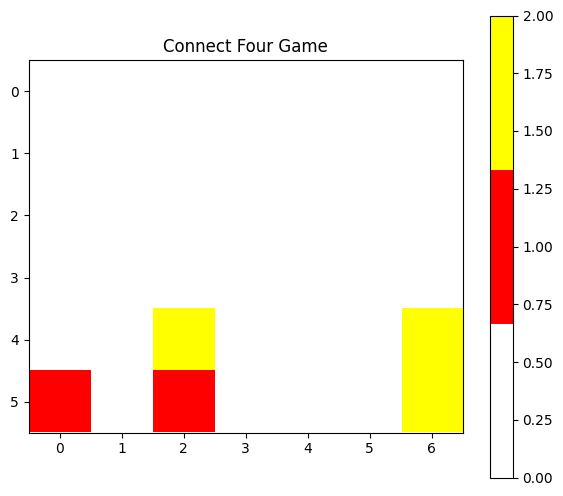


Tour du joueur 2


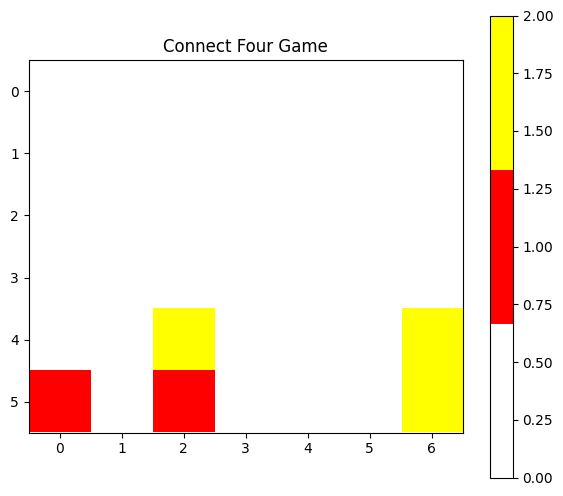

Coup joué: 1


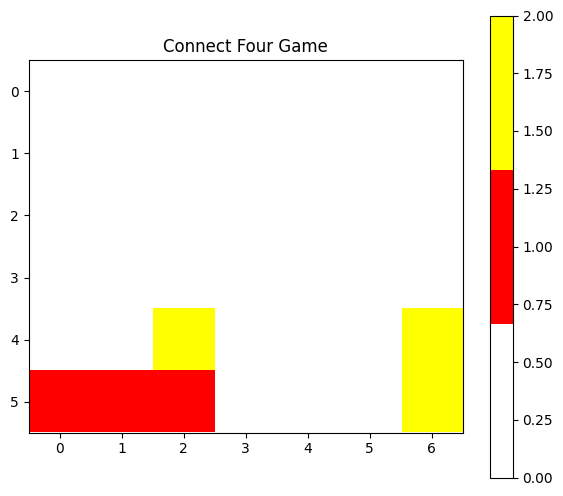


Tour du joueur 1


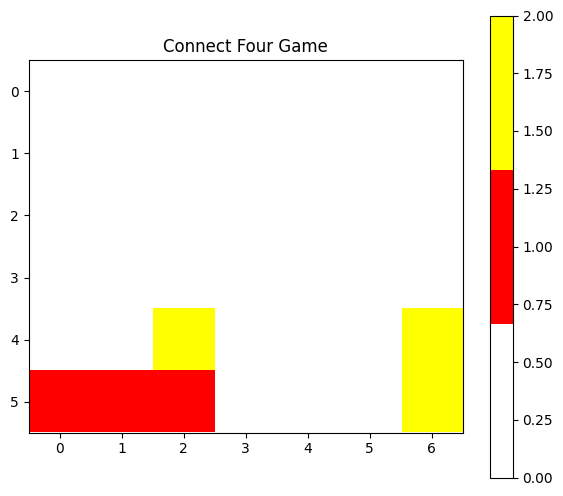

Coup joué: 3


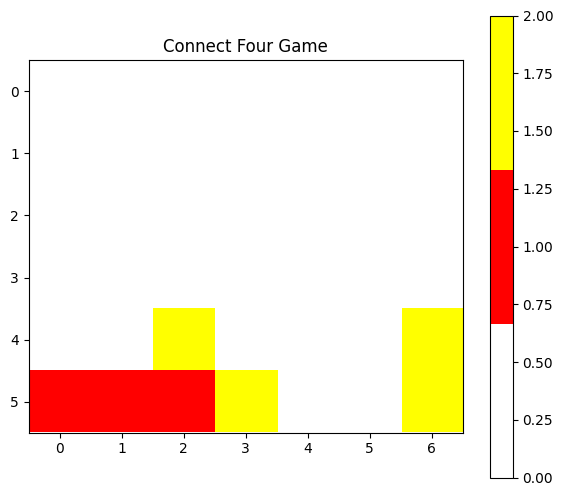


Tour du joueur 2


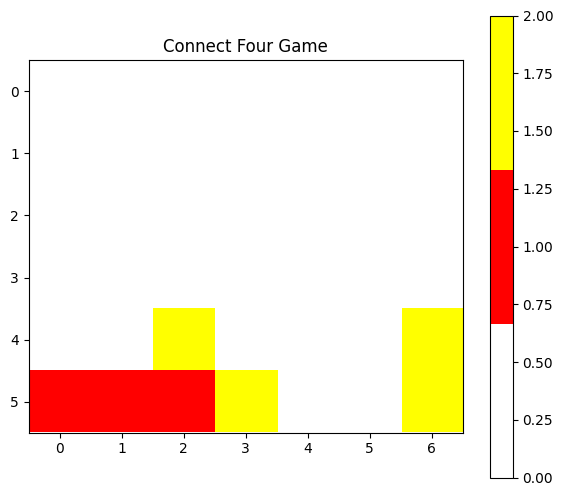

Coup joué: 0


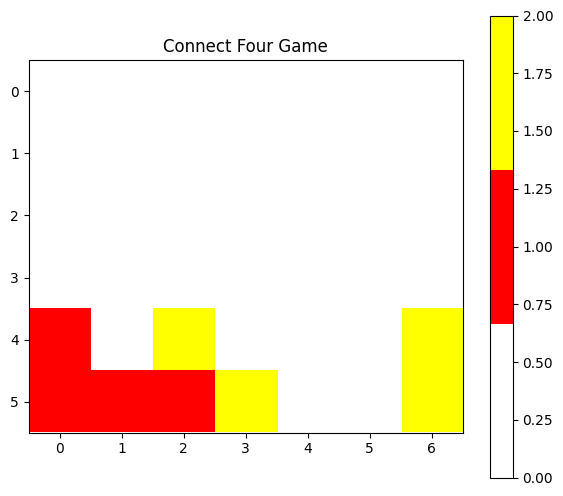


Tour du joueur 1


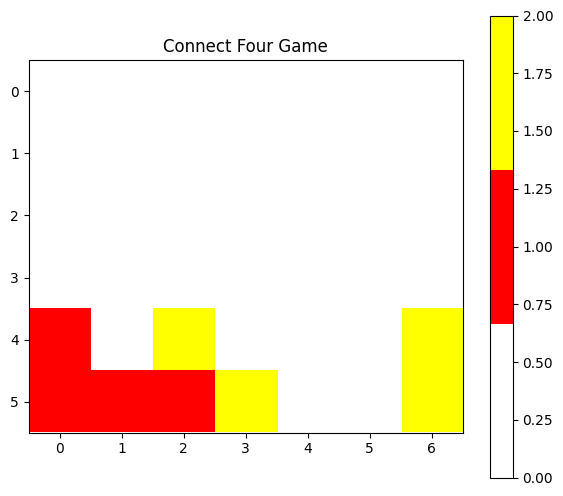

Coup joué: 0


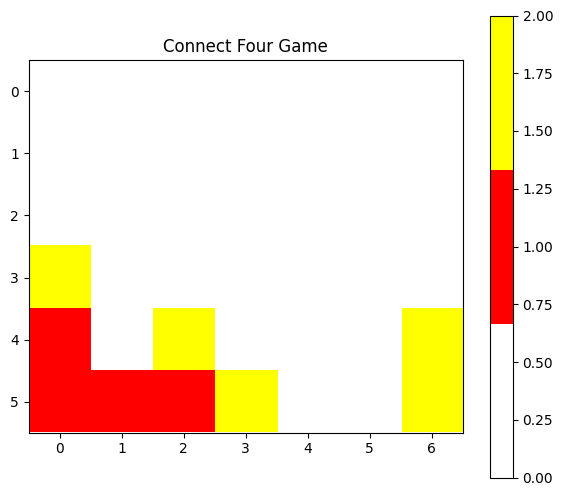


Tour du joueur 2


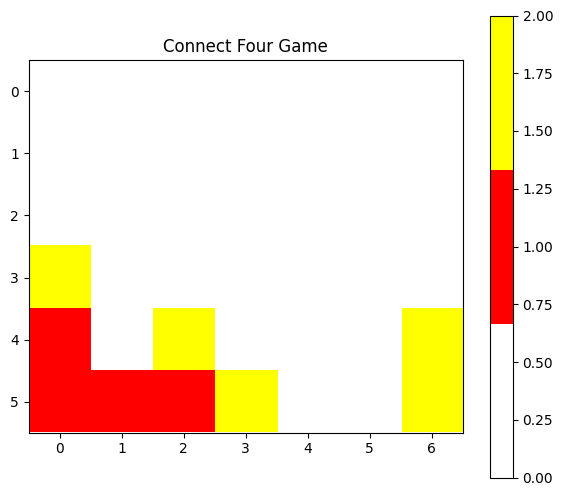

Coup joué: 2


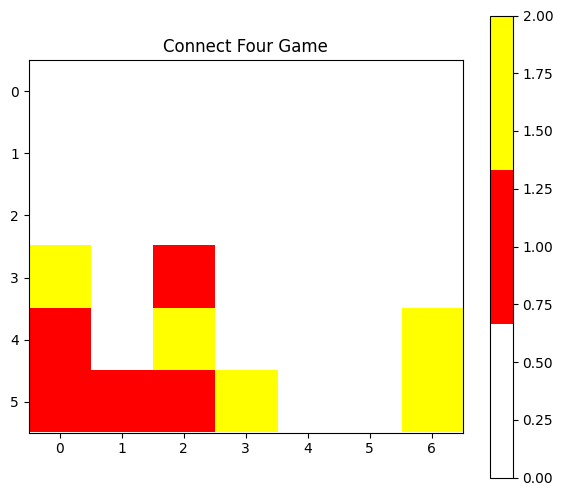


Tour du joueur 1


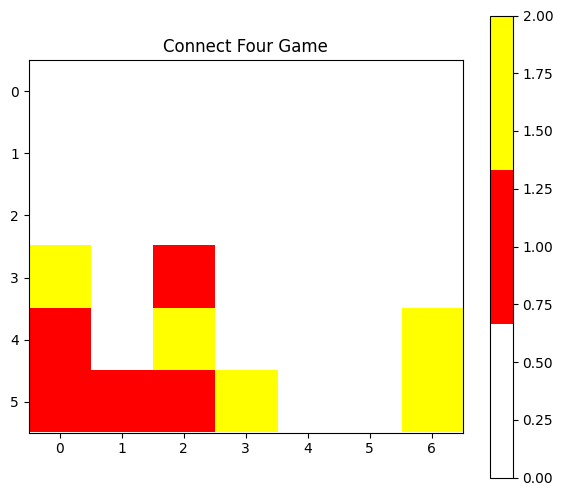

Coup joué: 4


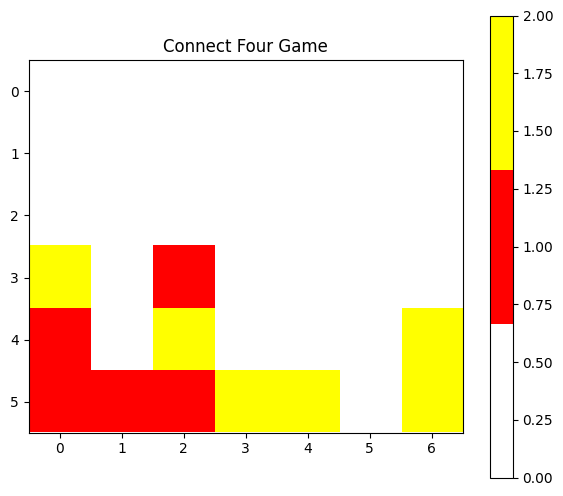


Tour du joueur 2


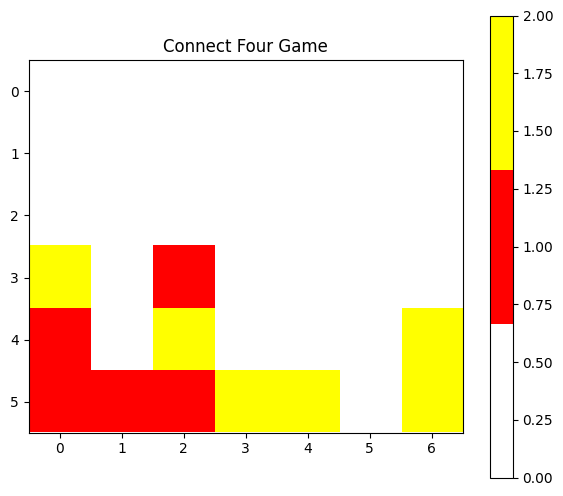

Coup joué: 0


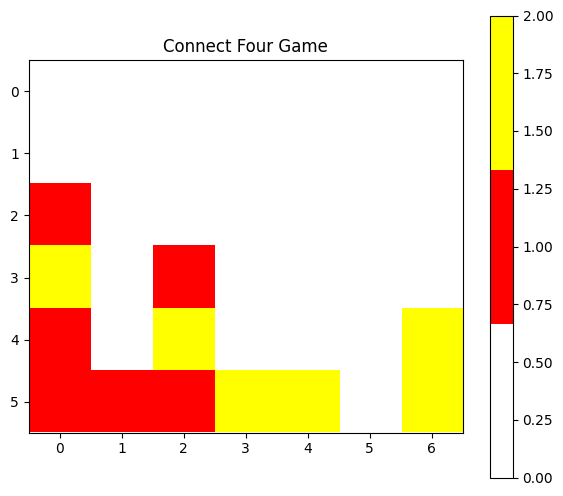


Tour du joueur 1


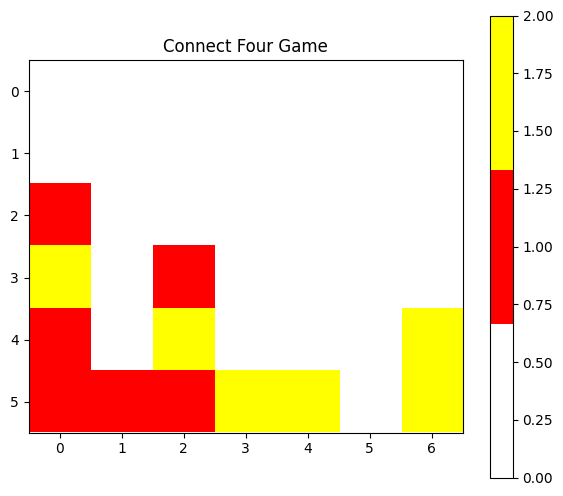

Coup joué: 6


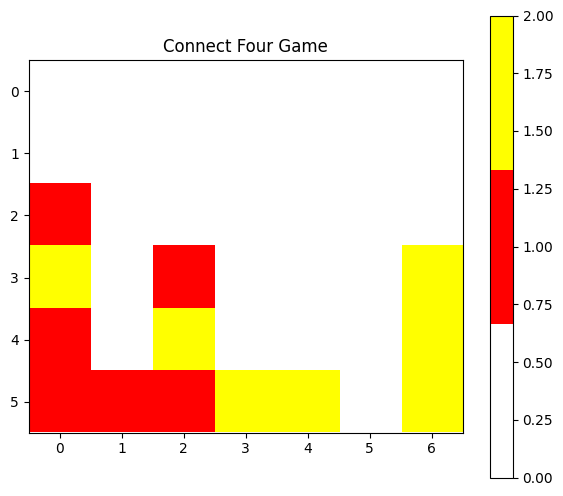


Tour du joueur 2


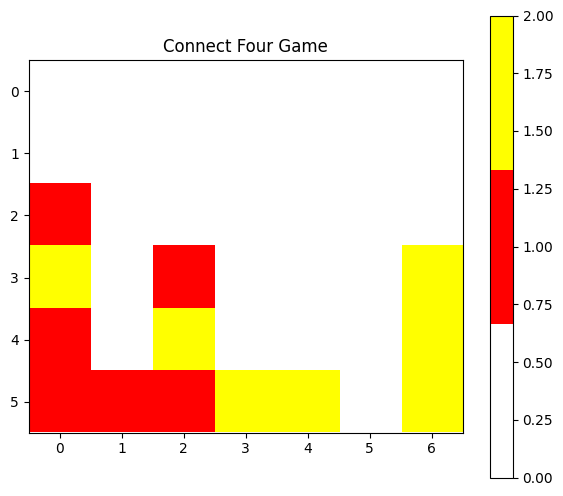

Coup joué: 2


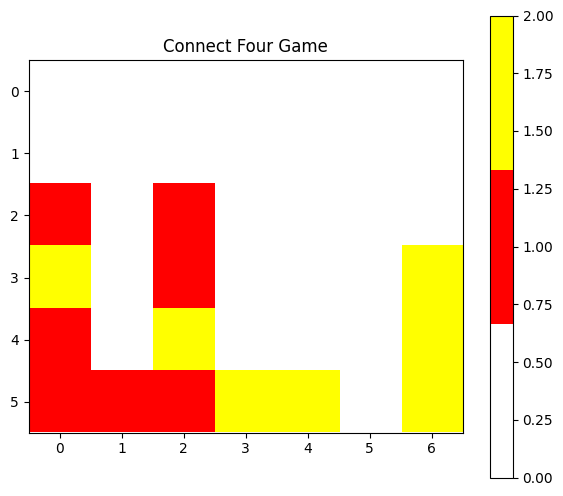


Tour du joueur 1


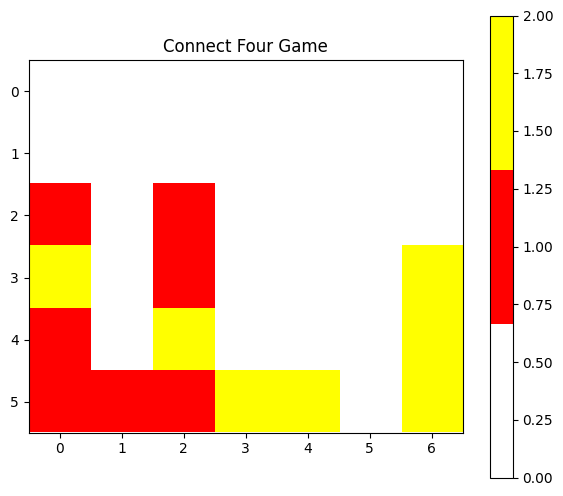

Coup joué: 2


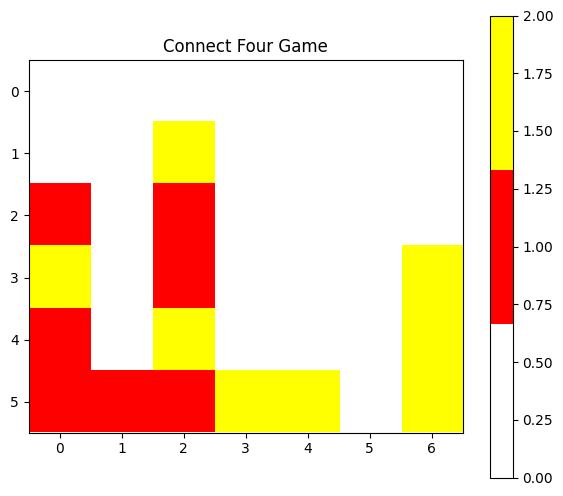


Tour du joueur 2


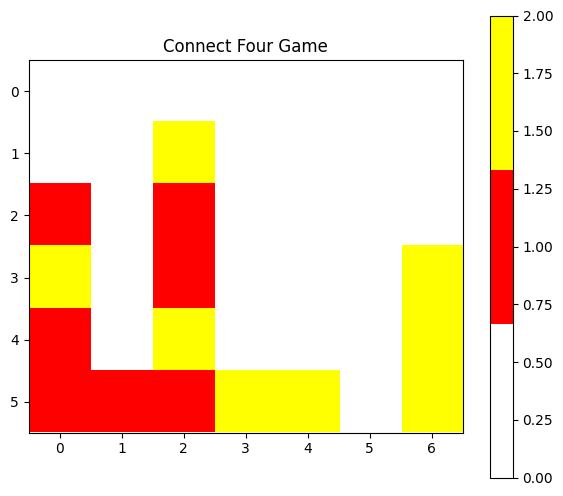

Coup joué: 5


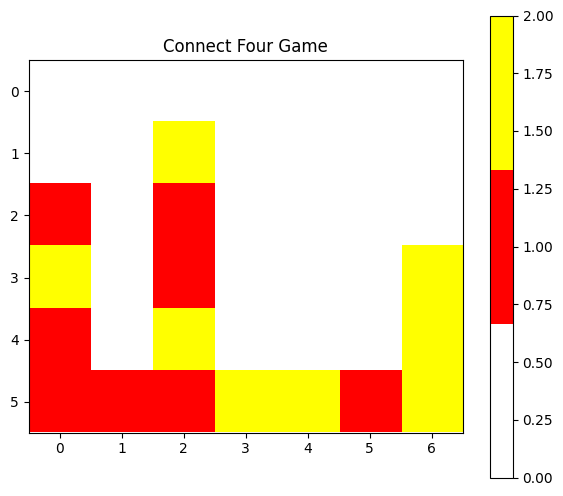


Tour du joueur 1


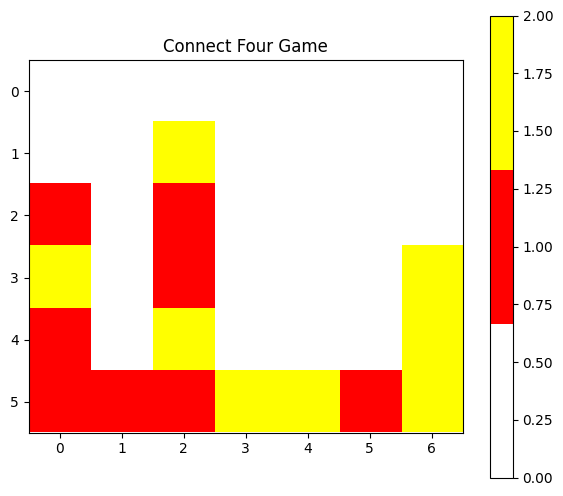

Coup joué: 3


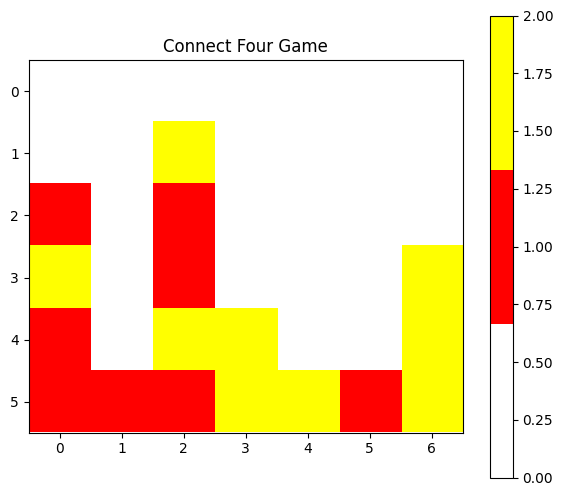


Tour du joueur 2


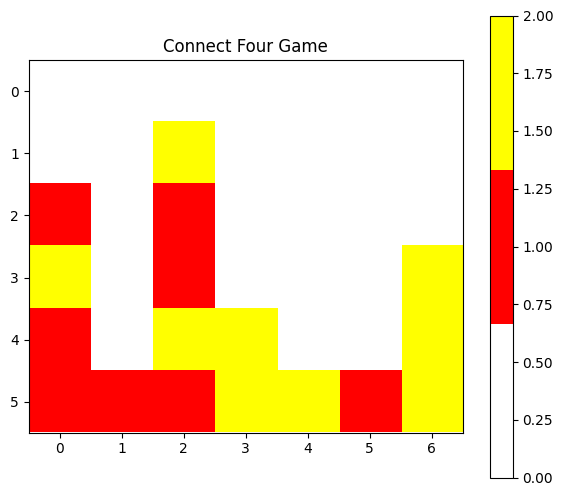

Coup joué: 1


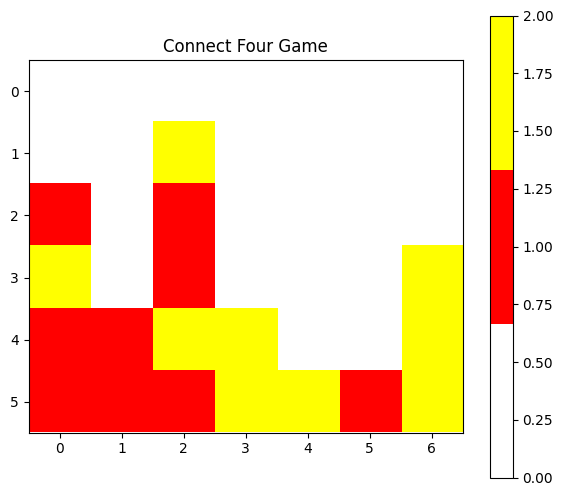


Tour du joueur 1


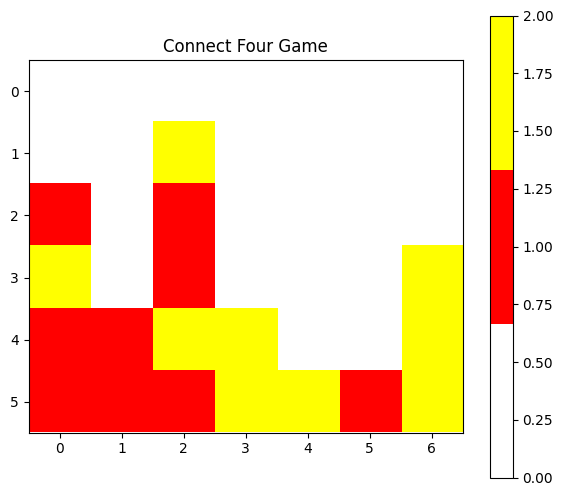

Coup joué: 4


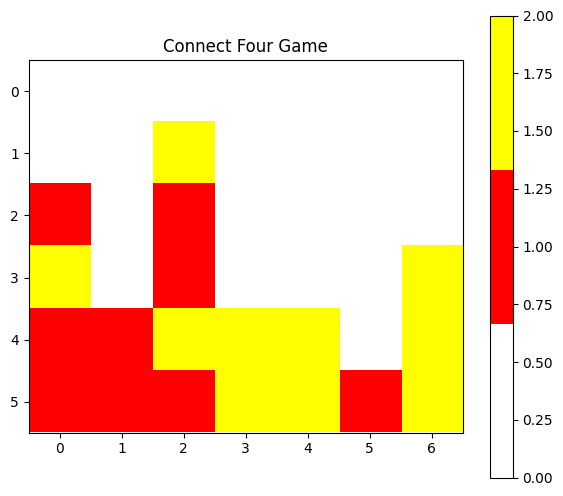


Tour du joueur 2


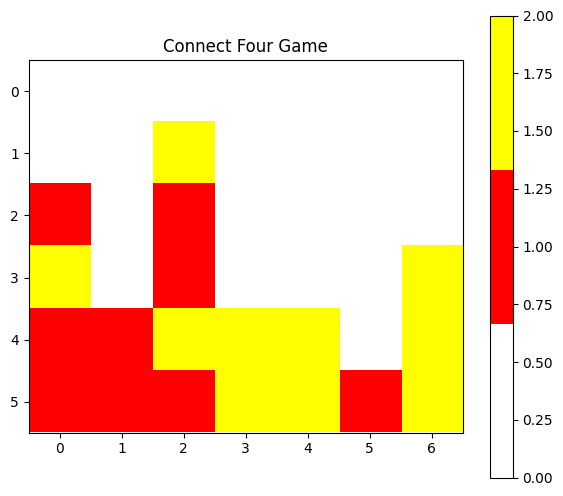

Coup joué: 5


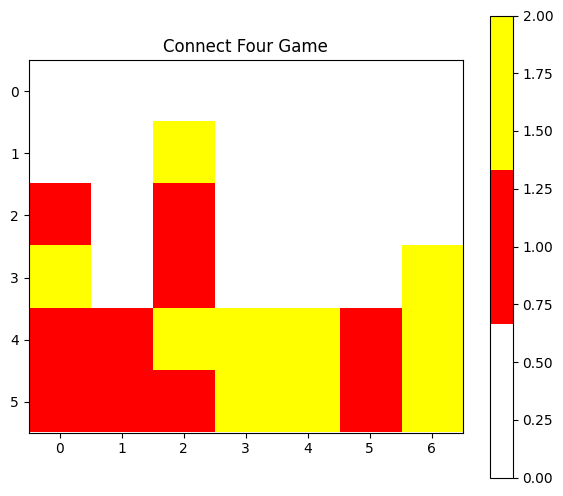


Tour du joueur 1


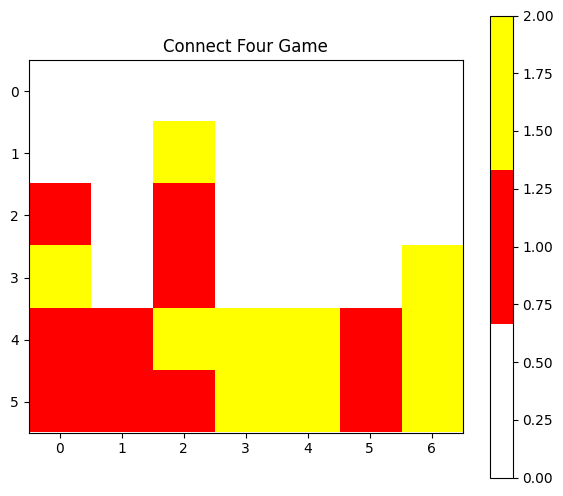

Coup joué: 5


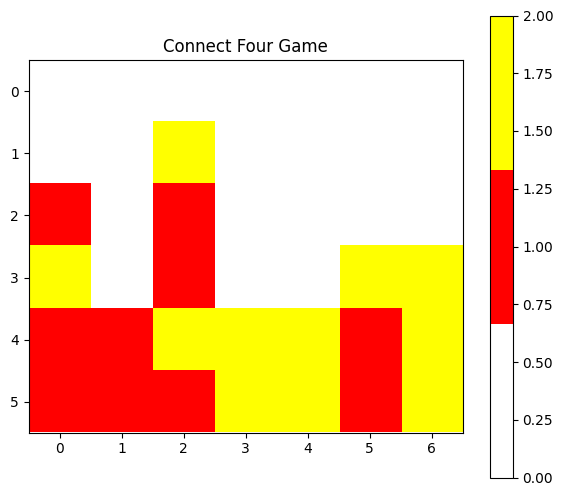


Tour du joueur 2


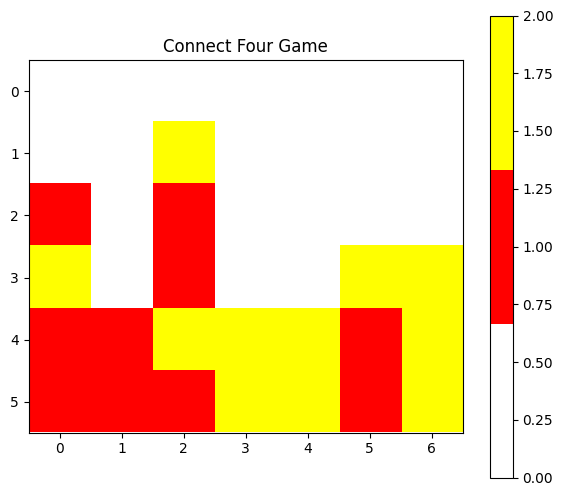

Coup joué: 2


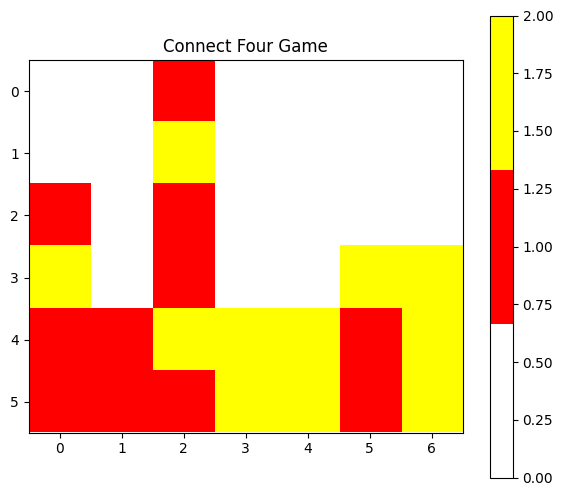


Tour du joueur 1


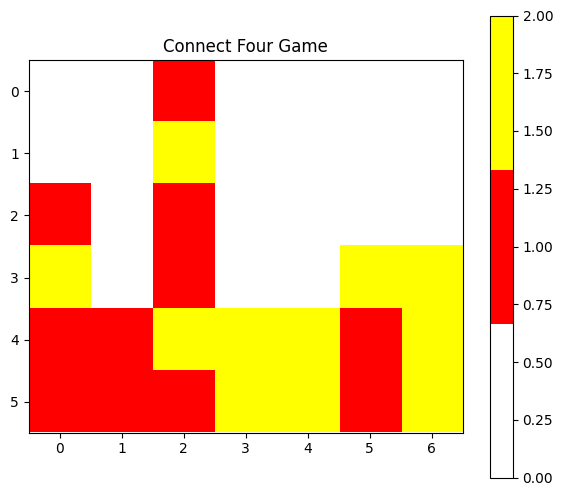

Coup joué: 6


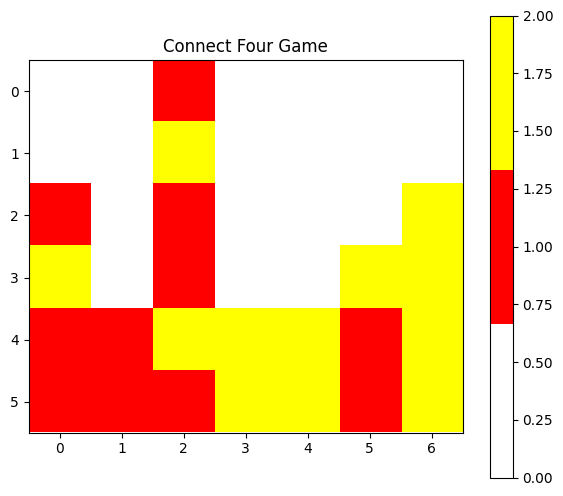

Le joueur 1 a gagné!


In [12]:
# Smarter Agent that selects a winning move or a random move
class SmarterAgent:
    def __init__(self, player_id):
        self.player_id = player_id

    def get_action(self, env):

        valid_moves = env.get_valid_moves()

        # Check for a winning move
        for move in valid_moves:
            row = 0
            while row < env.rows - 1 and env.board[row + 1][move] == 0:
                row += 1
            # Temporarily apply the move
            env.board[row][move] = self.player_id
            if env.is_win(row, move):
                env.board[row][move] = 0  # Undo the move
                return move  # Return the winning move
            env.board[row][move] = 0  # Undo the move

        # If no winning move, pick a random valid move
        return random.choice(valid_moves)

agent1 = SmarterAgent(player_id=1)
agent2 = RandomAgent(player_id=2)
play_game(agent1, agent2)


Tour du joueur 1


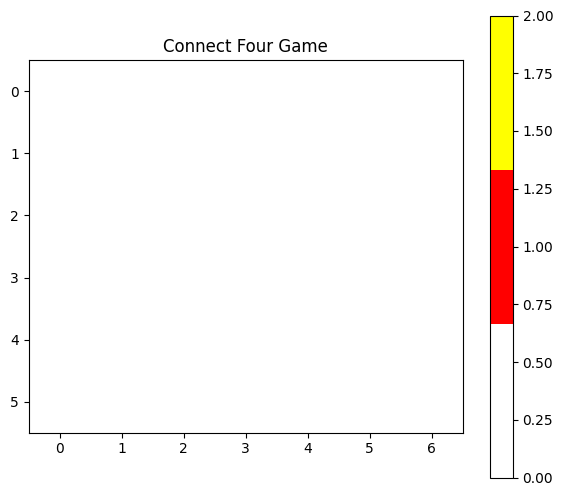

Coup joué: 0


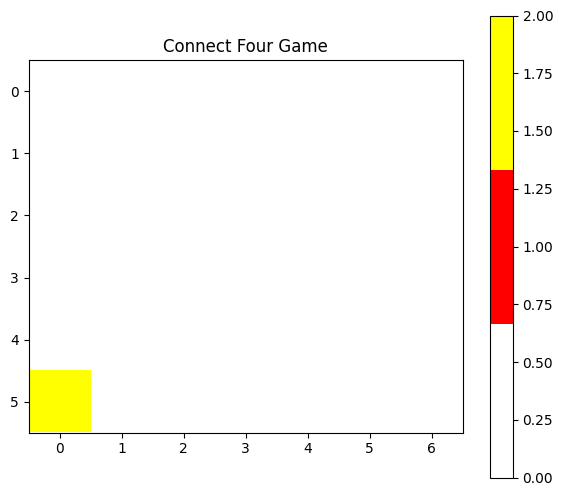


Tour du joueur 2


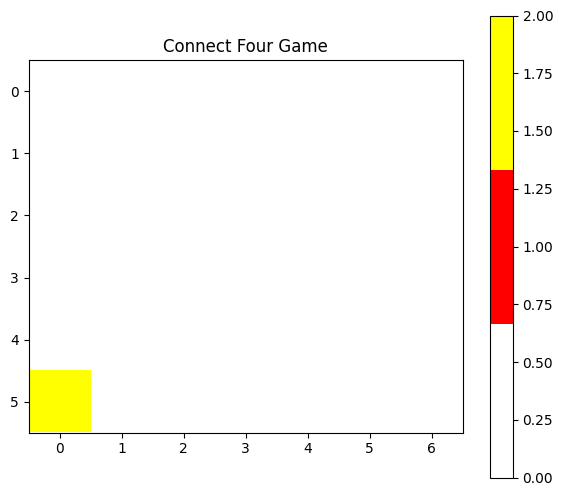

Coup joué: 0


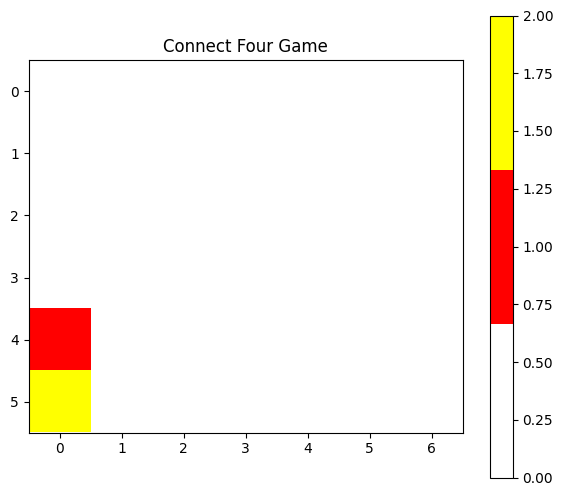


Tour du joueur 1


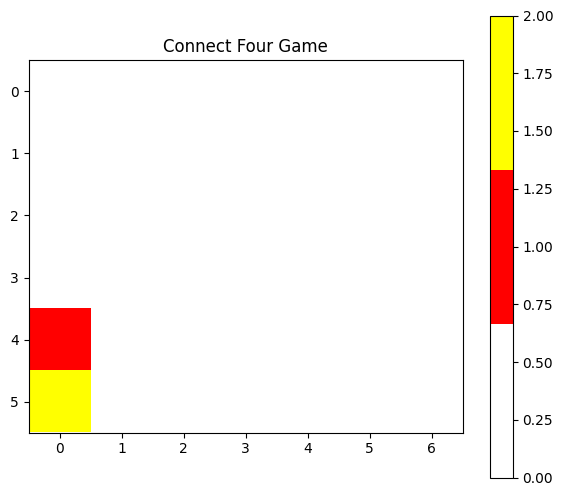

Coup joué: 0


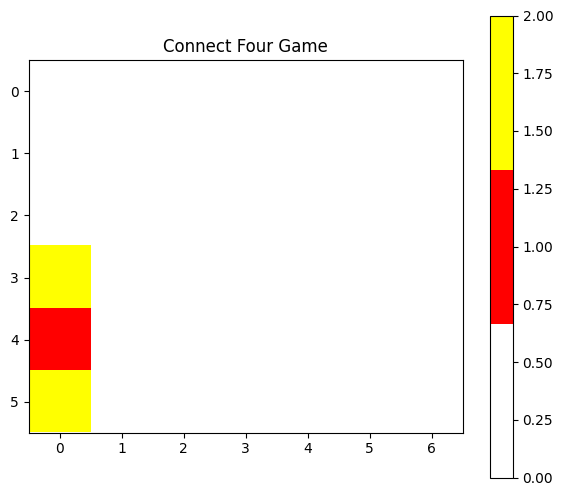


Tour du joueur 2


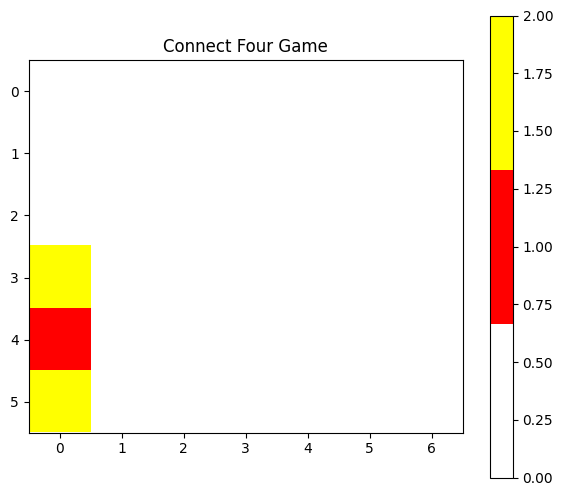

Coup joué: 0


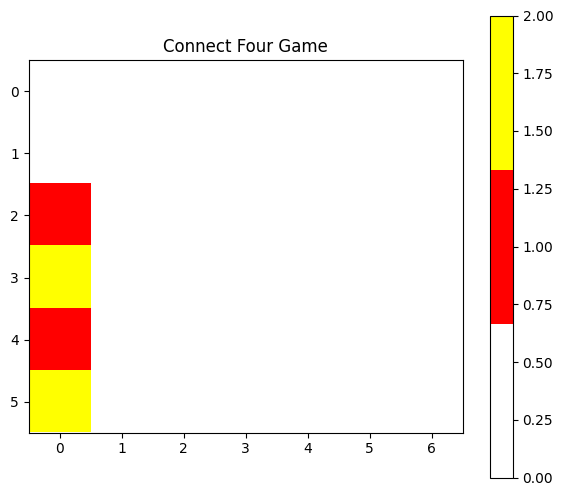


Tour du joueur 1


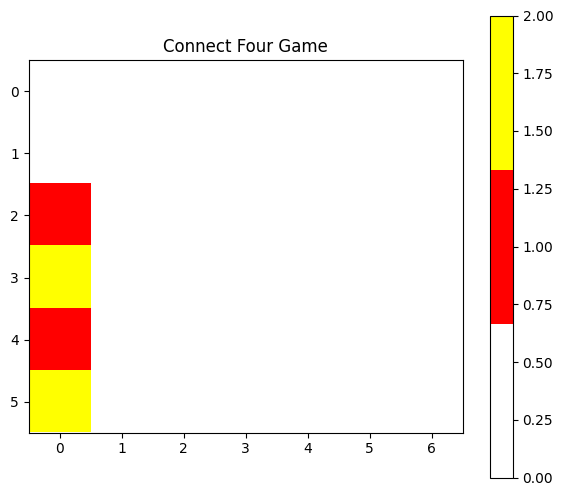

Coup joué: 0


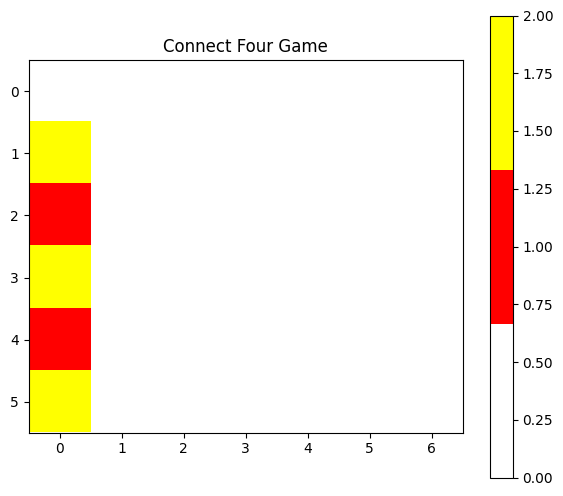


Tour du joueur 2


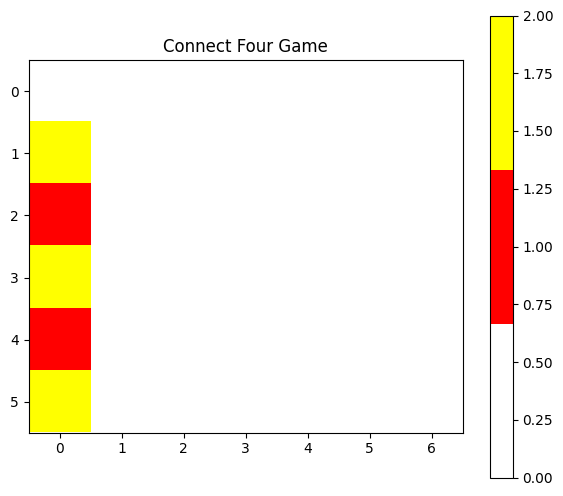

Coup joué: 6


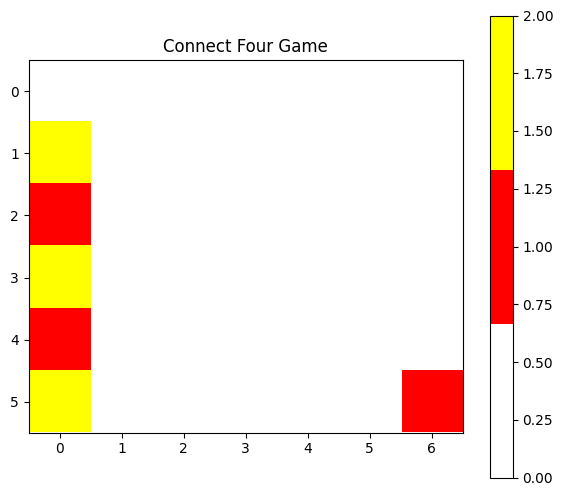


Tour du joueur 1


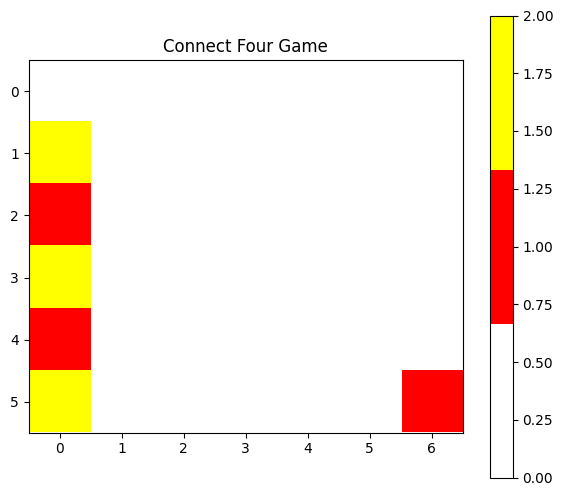

Coup joué: 1


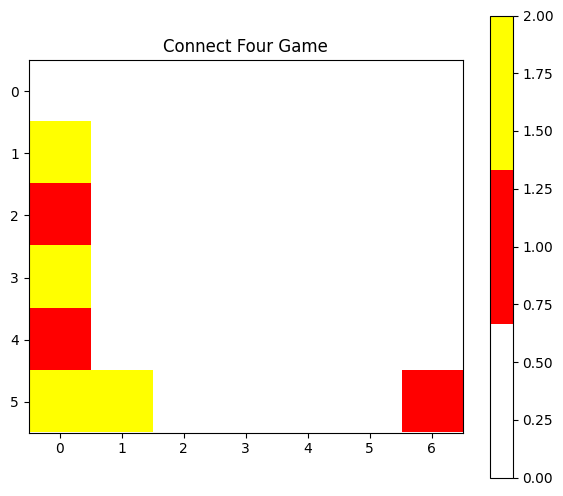


Tour du joueur 2


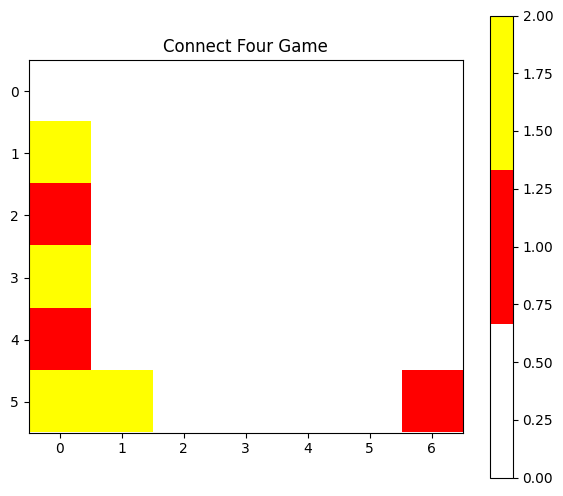

Coup joué: 4


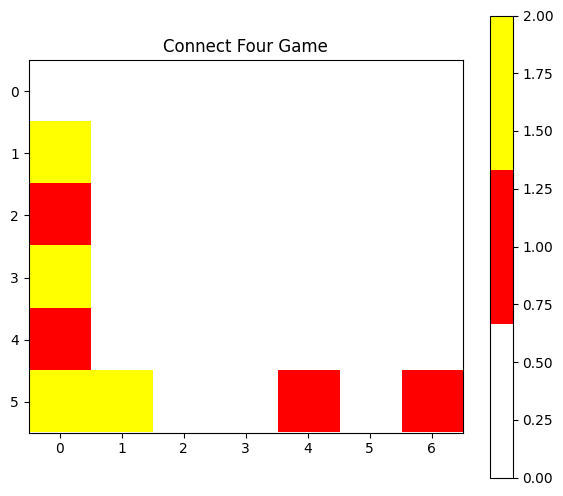


Tour du joueur 1


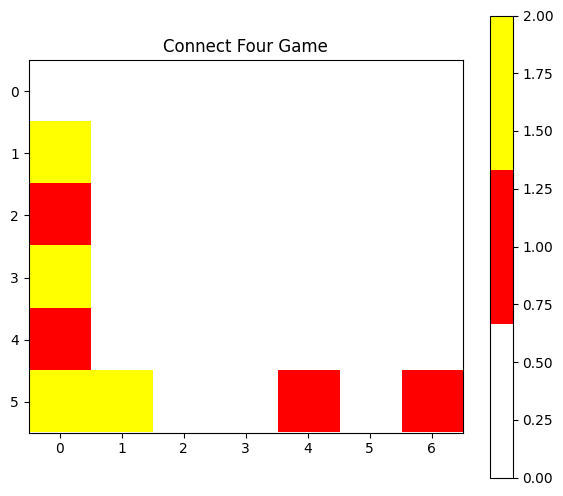

Coup joué: 5


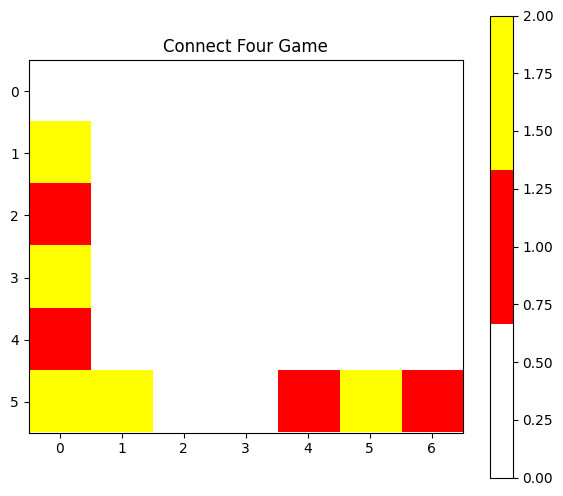


Tour du joueur 2


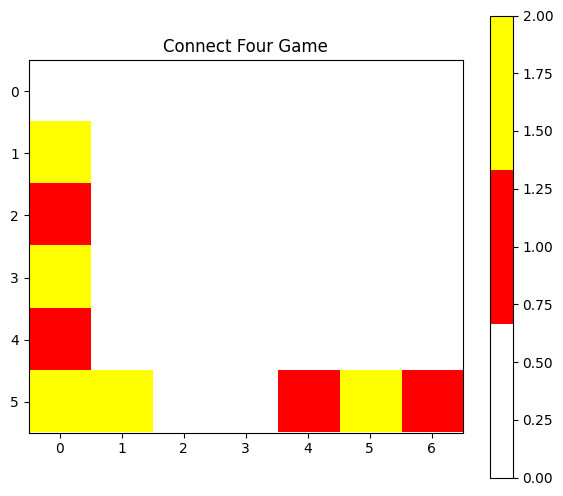

Coup joué: 5


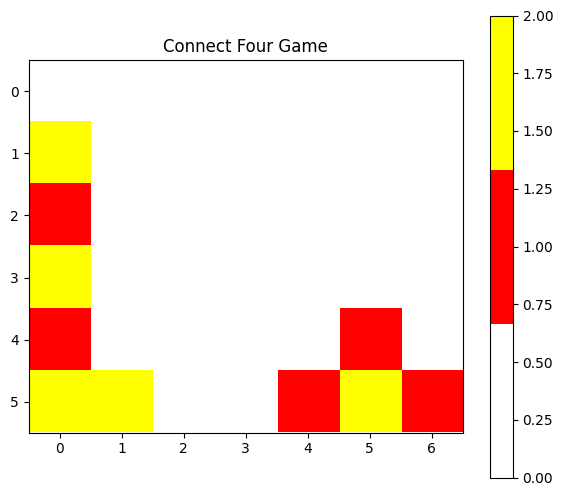


Tour du joueur 1


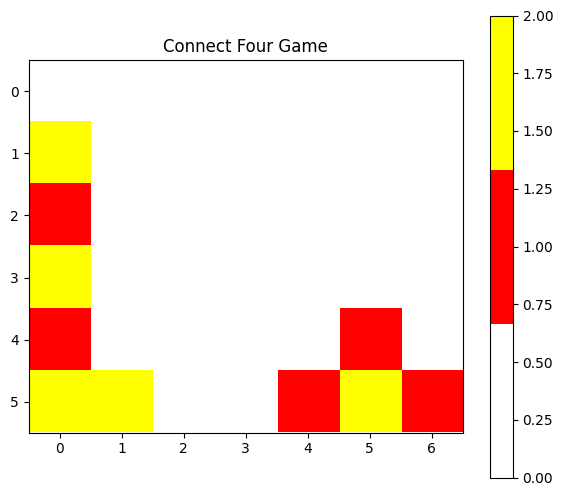

Coup joué: 4


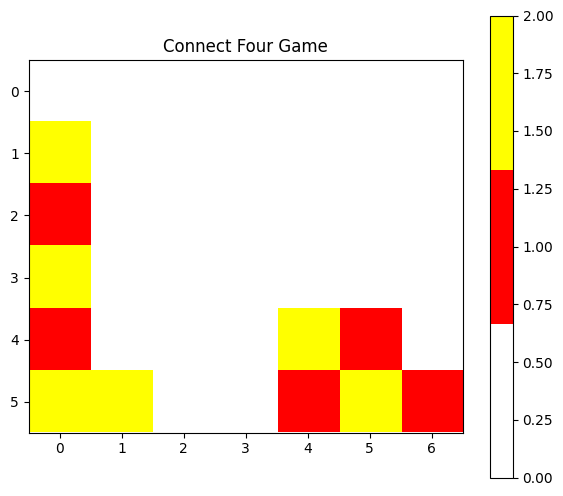


Tour du joueur 2


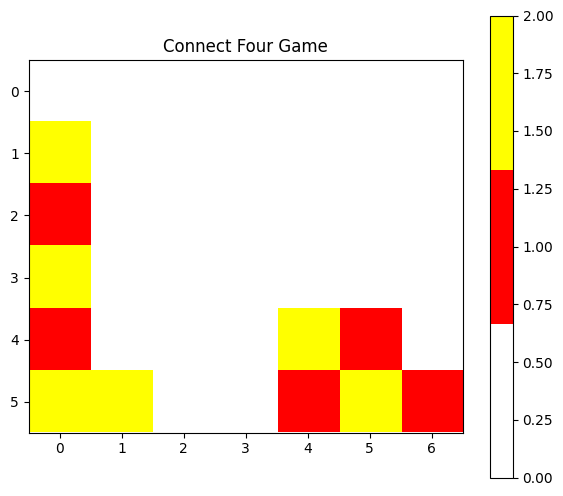

Coup joué: 2


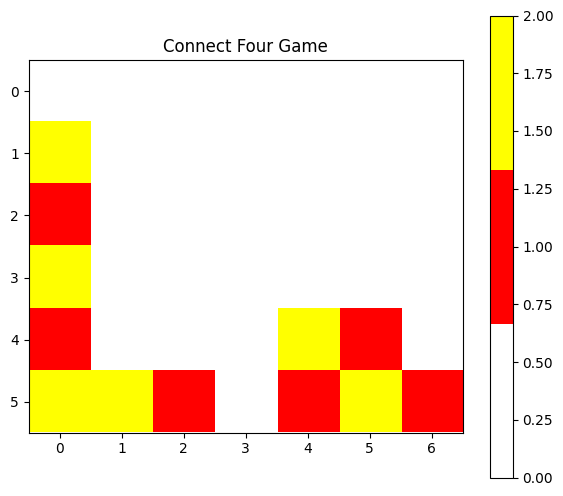


Tour du joueur 1


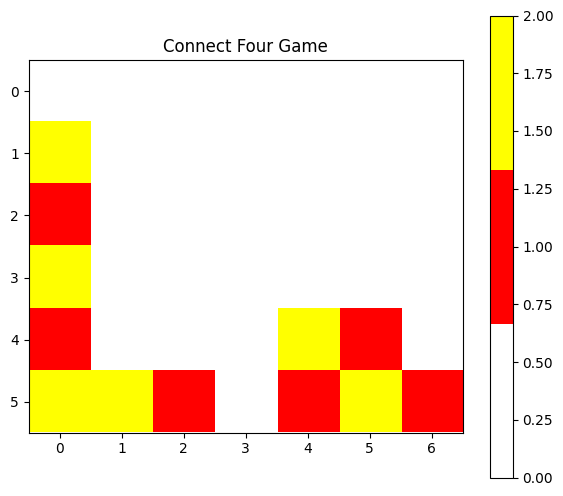

Coup joué: 3


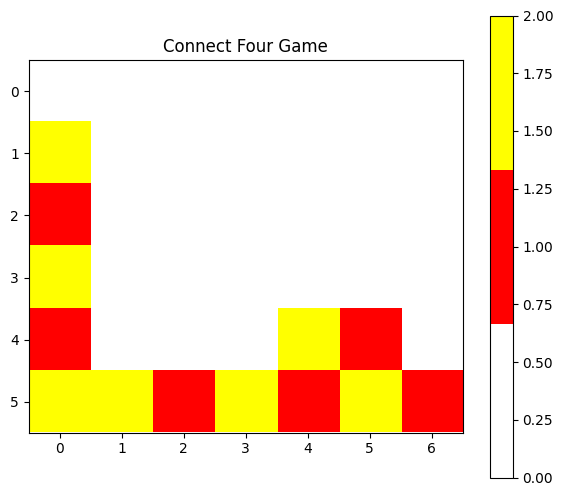


Tour du joueur 2


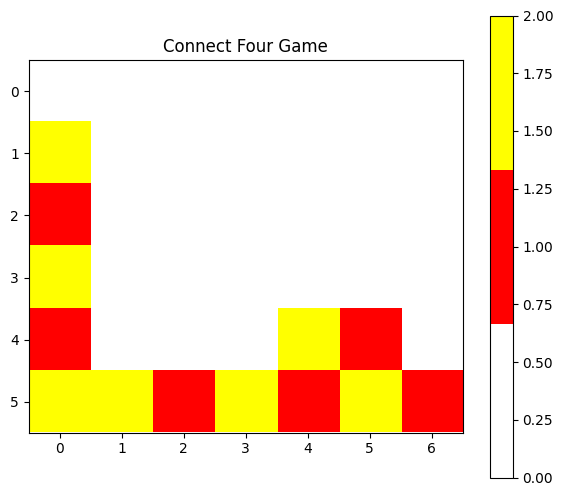

Coup joué: 1


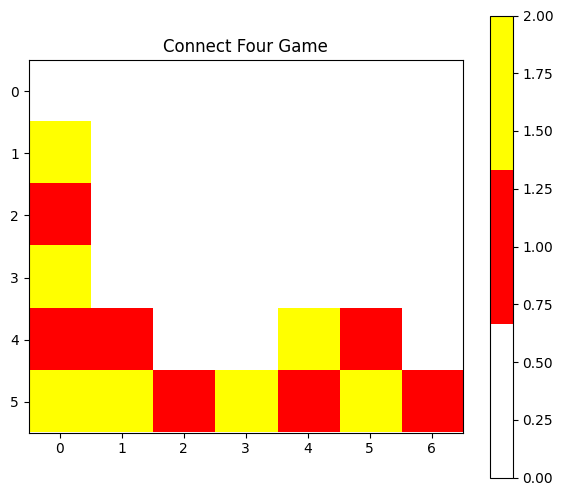


Tour du joueur 1


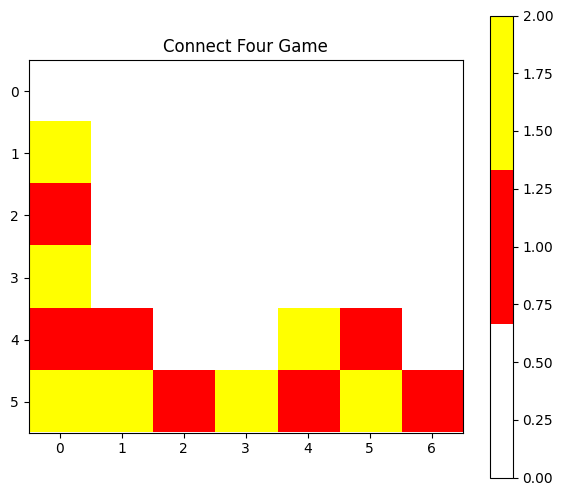

Coup joué: 2


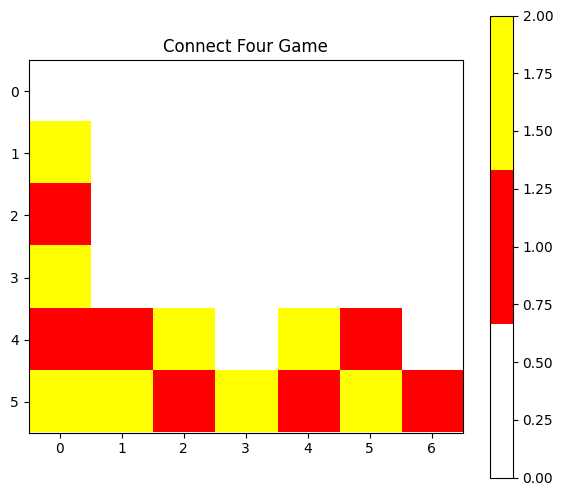


Tour du joueur 2


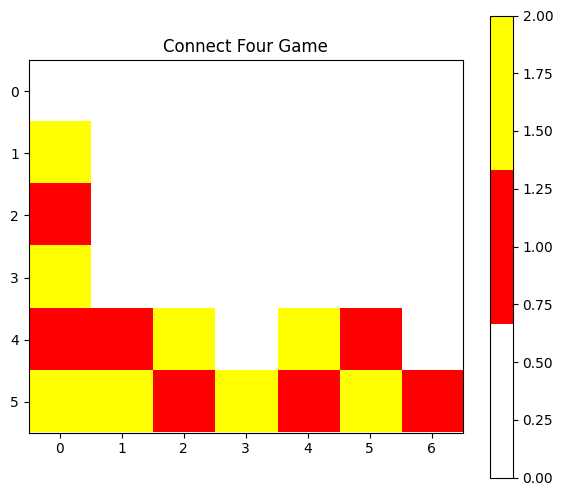

Coup joué: 1


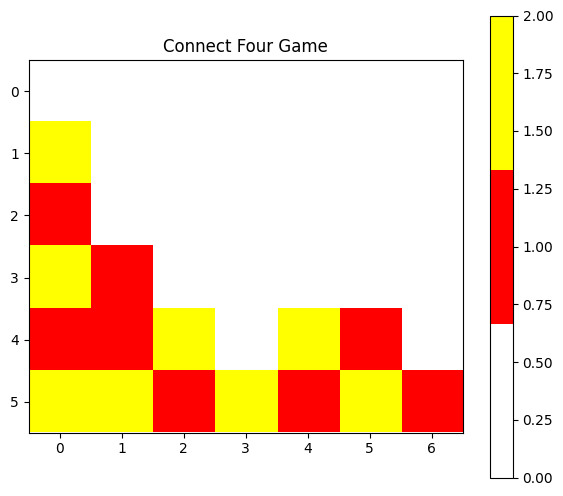


Tour du joueur 1


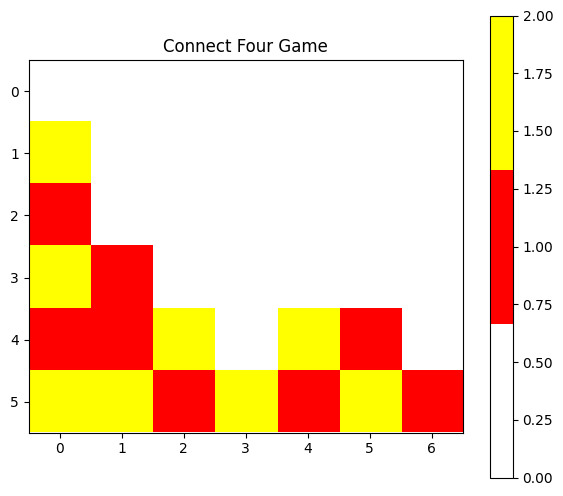

Coup joué: 1


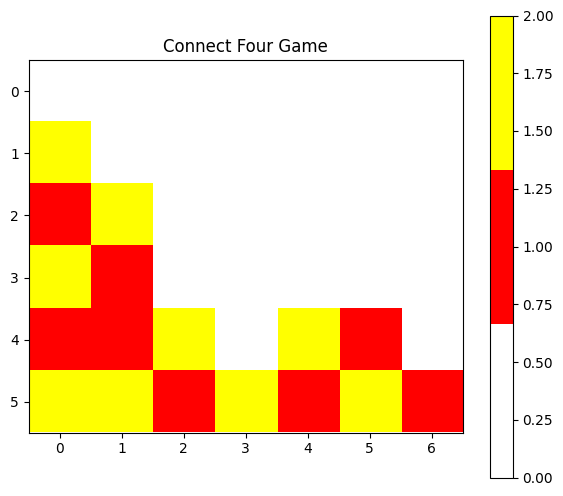


Tour du joueur 2


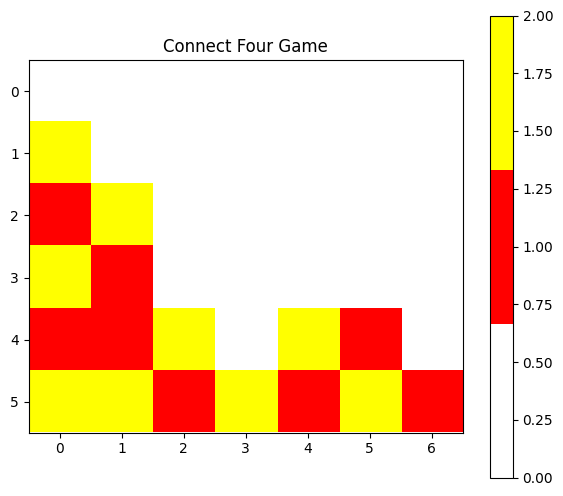

Coup joué: 6


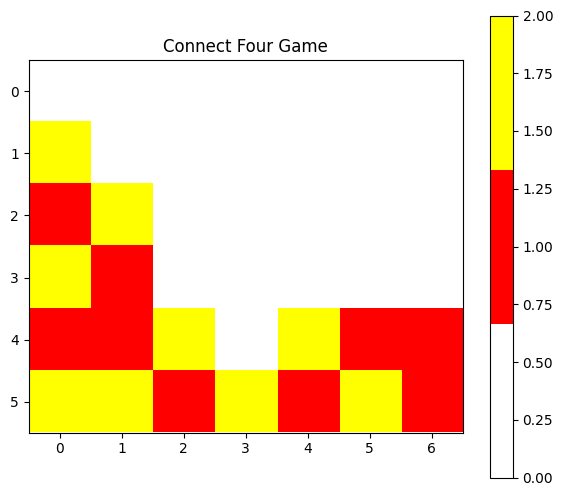


Tour du joueur 1


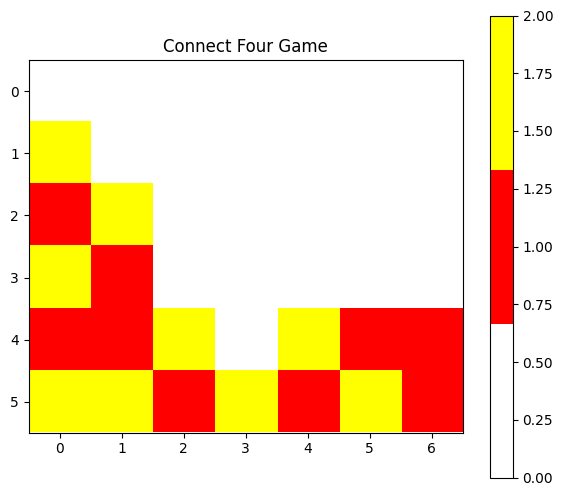

Coup joué: 6


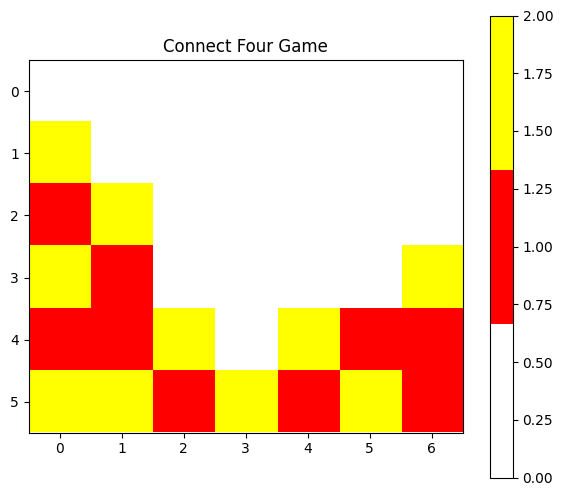


Tour du joueur 2


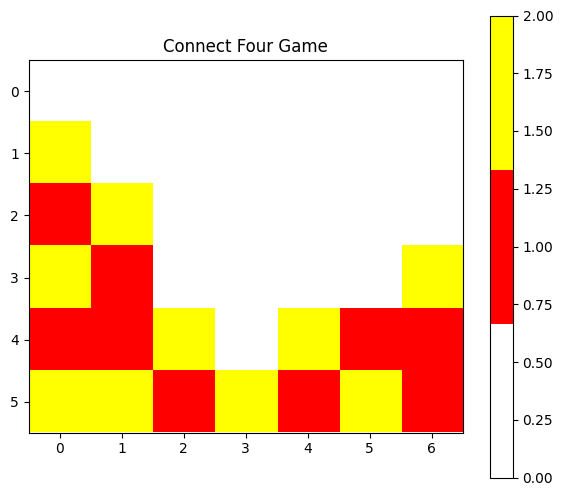

Coup joué: 3


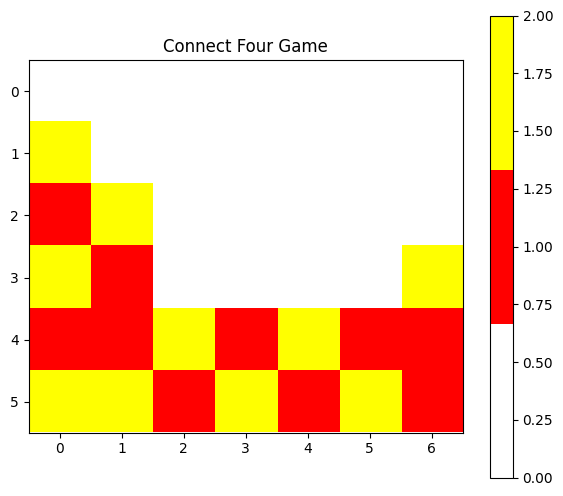


Tour du joueur 1


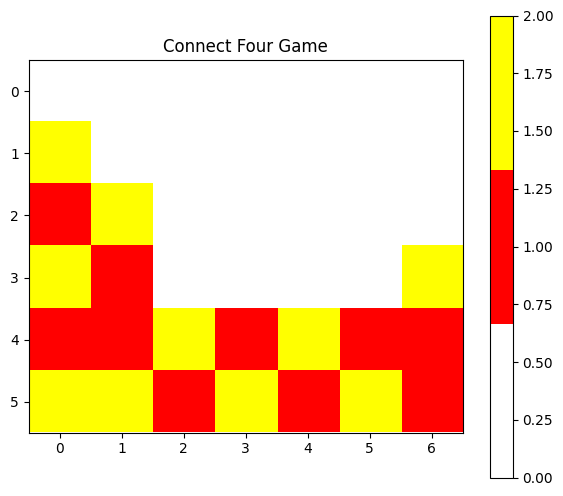

Coup joué: 4


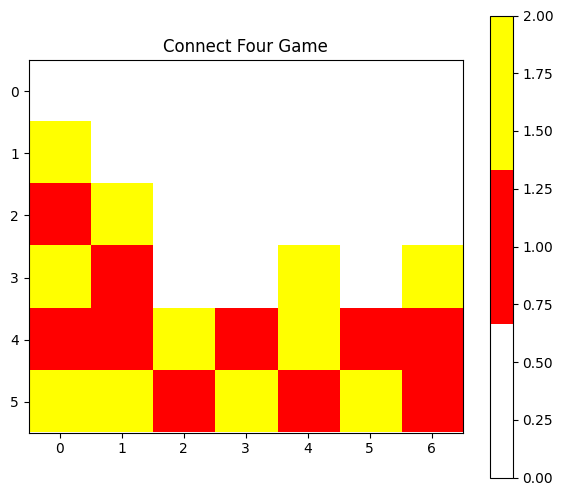


Tour du joueur 2


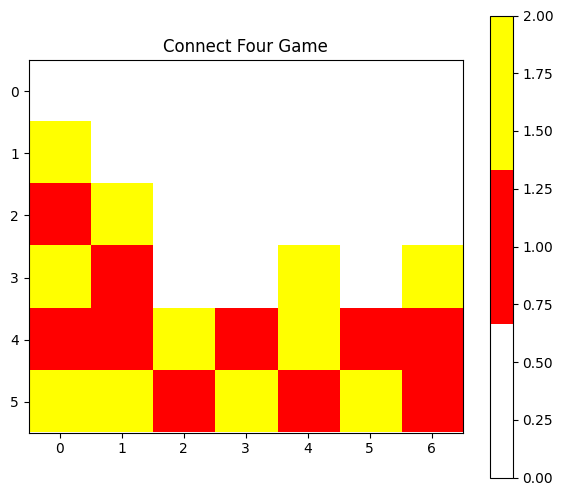

Coup joué: 3


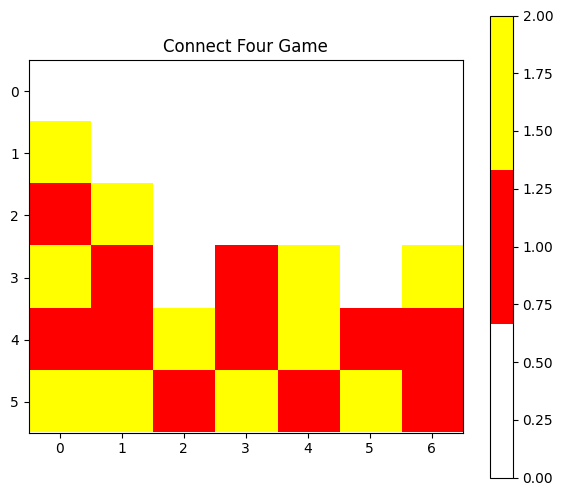


Tour du joueur 1


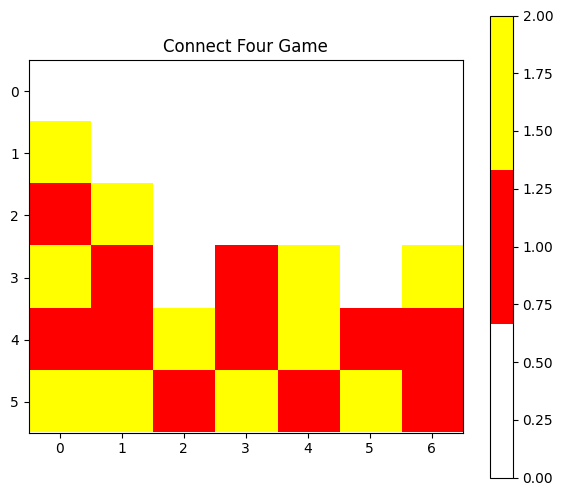

Coup joué: 2


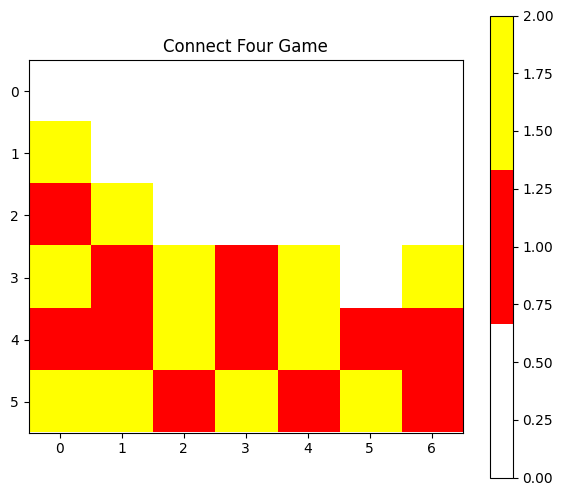


Tour du joueur 2


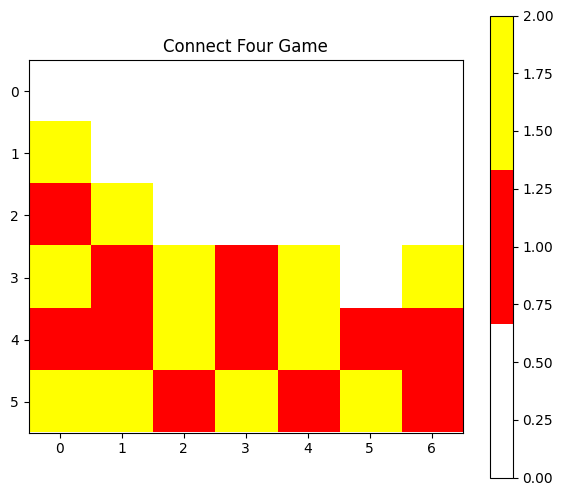

Coup joué: 3


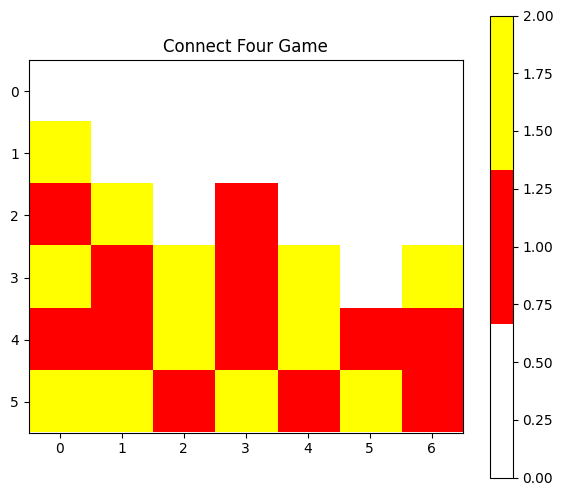


Tour du joueur 1


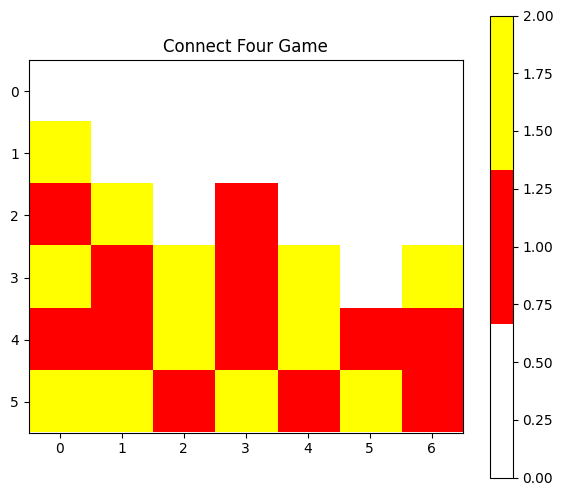

Coup joué: 3


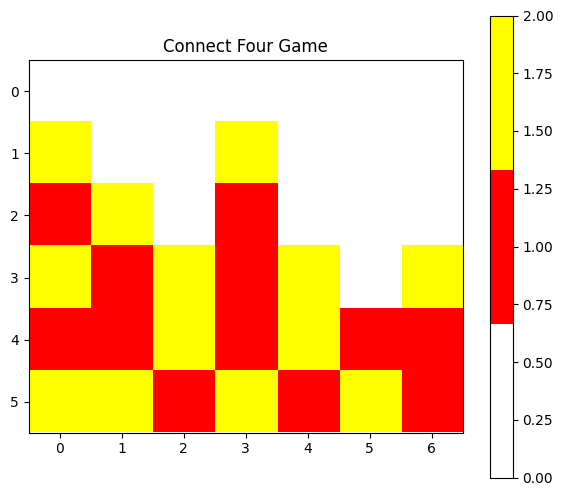


Tour du joueur 2


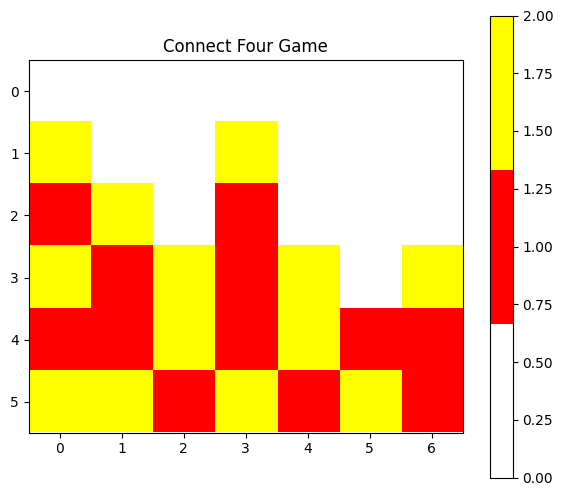

Coup joué: 6


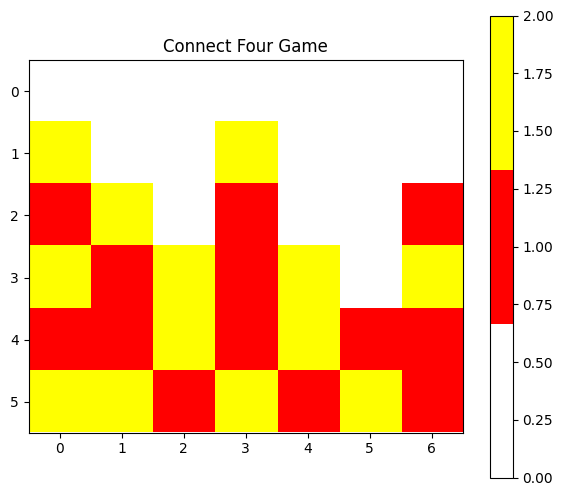


Tour du joueur 1


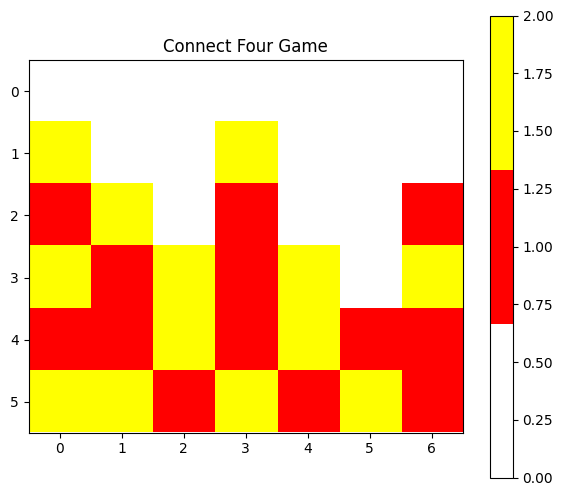

Coup joué: 2


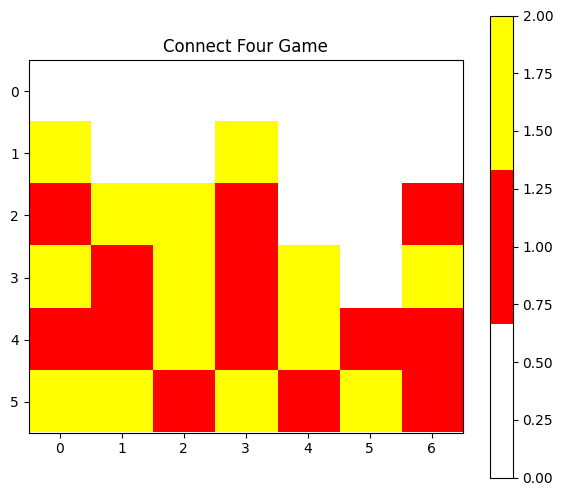


Tour du joueur 2


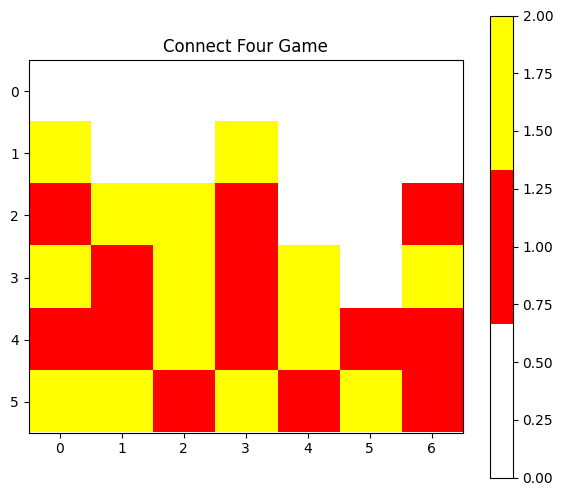

Coup joué: 4


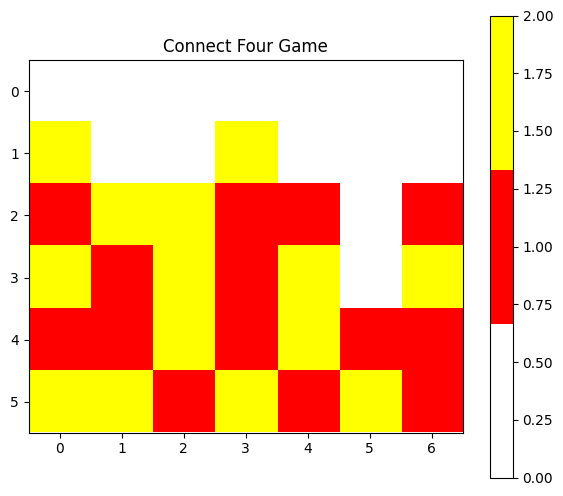


Tour du joueur 1


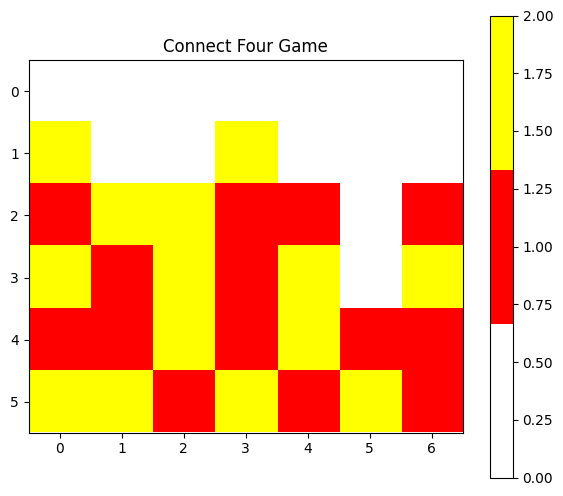

Coup joué: 5


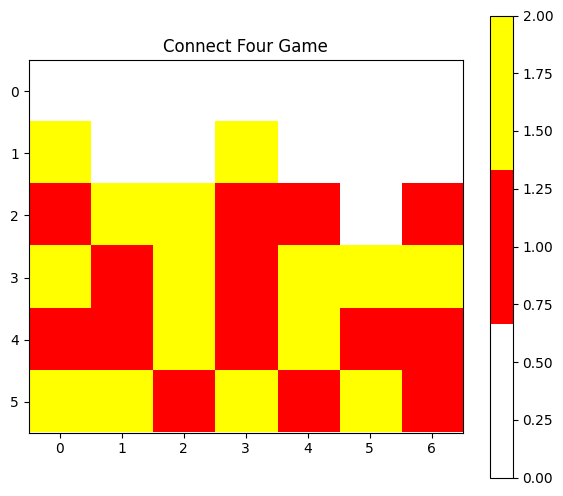


Tour du joueur 2


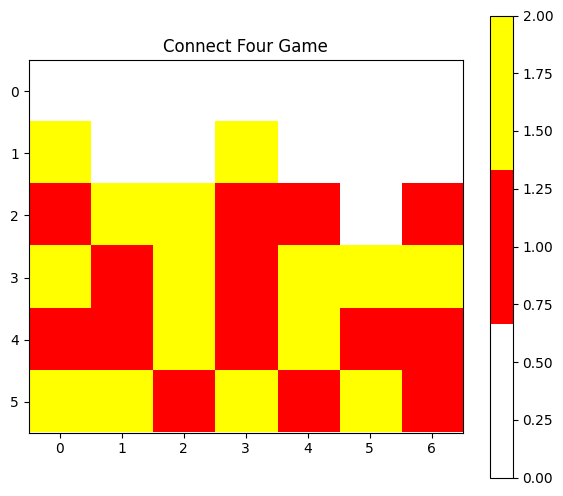

Coup joué: 0


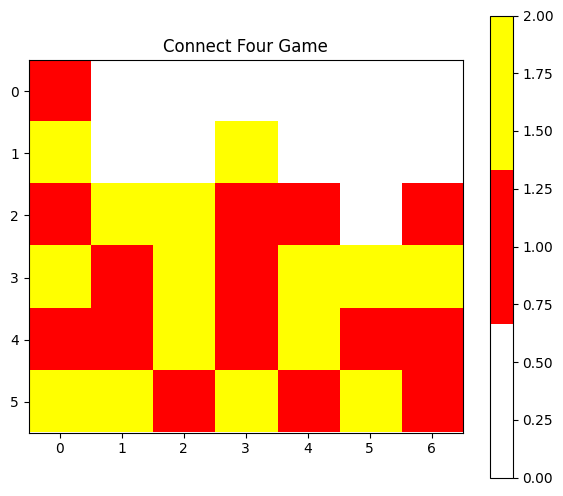


Tour du joueur 1


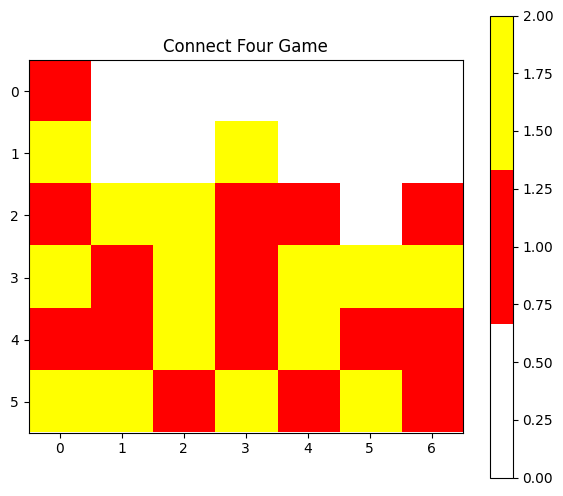

Coup joué: 5


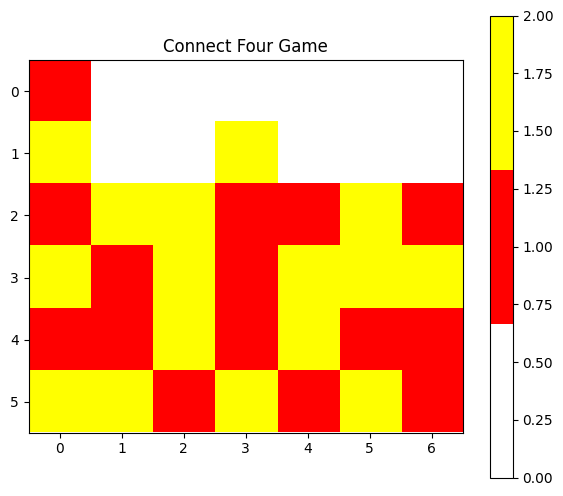


Tour du joueur 2


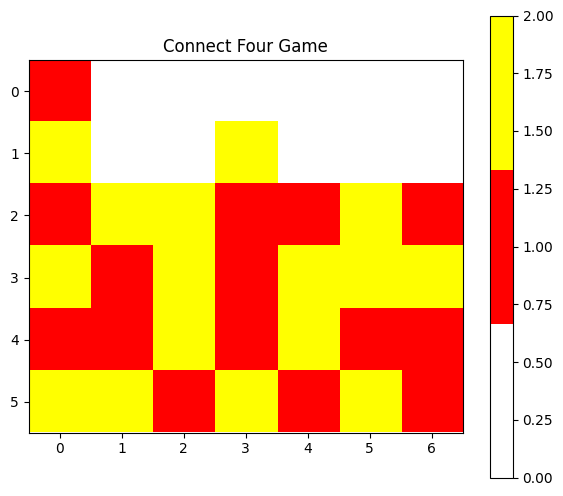

Coup joué: 5


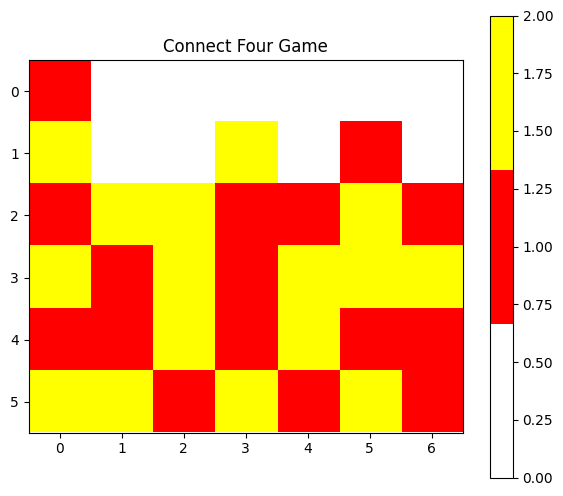


Tour du joueur 1


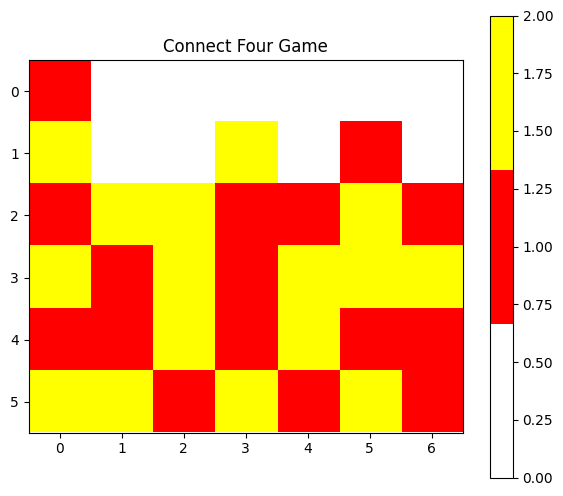

Coup joué: 4


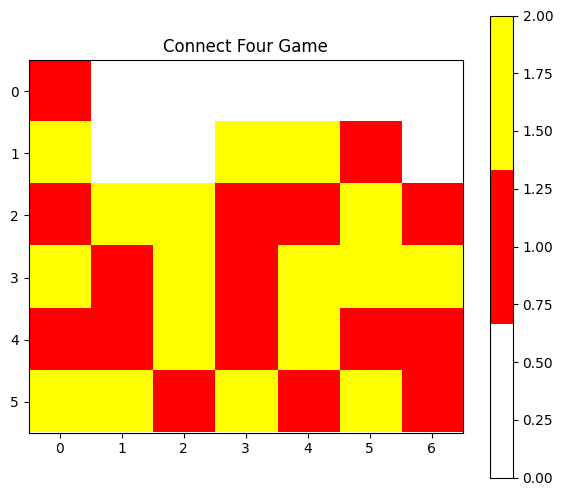


Tour du joueur 2


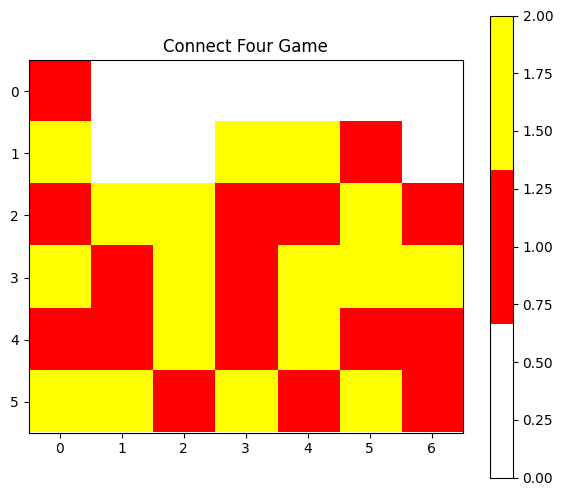

Coup joué: 3


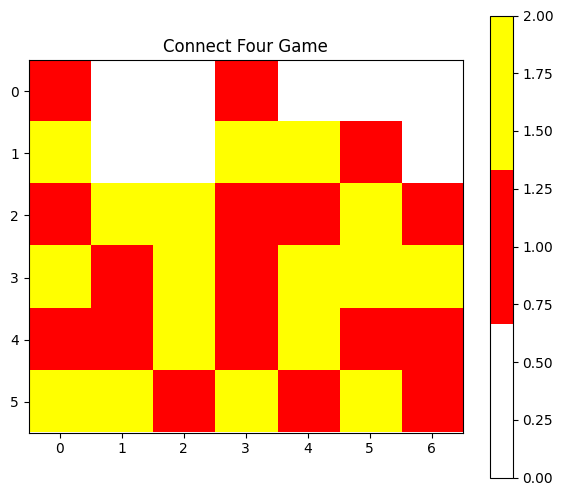


Tour du joueur 1


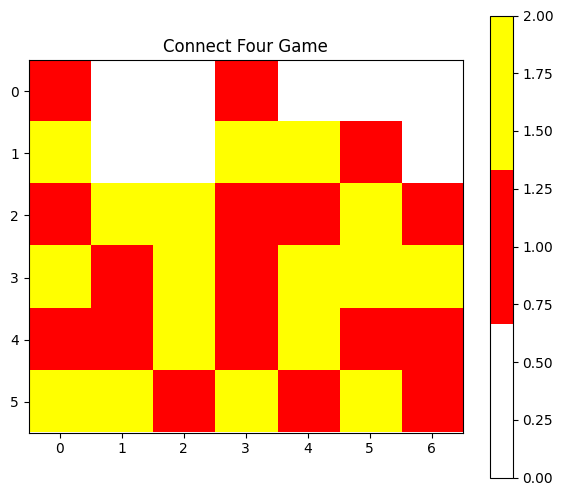

Coup joué: 4


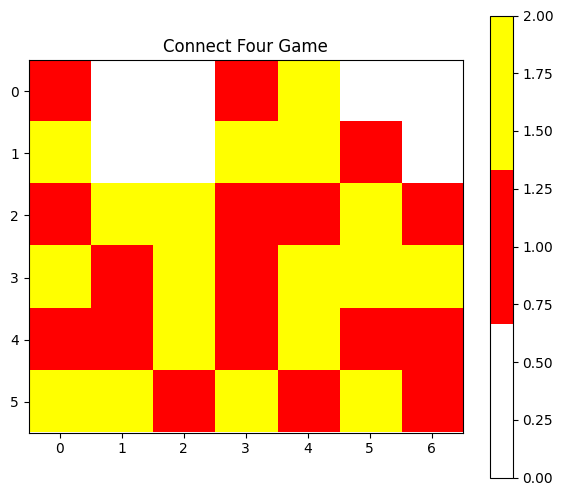


Tour du joueur 2


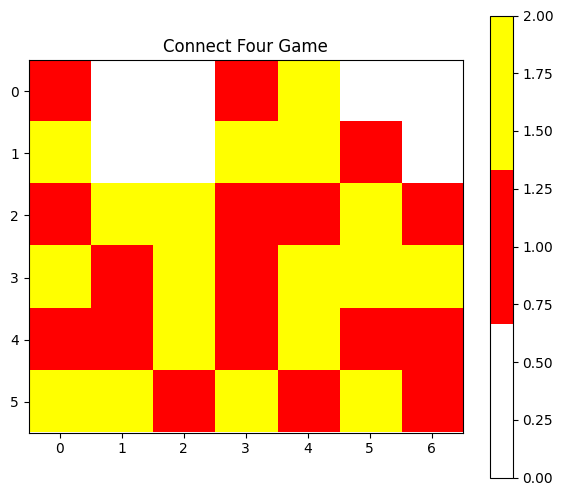

Coup joué: 2


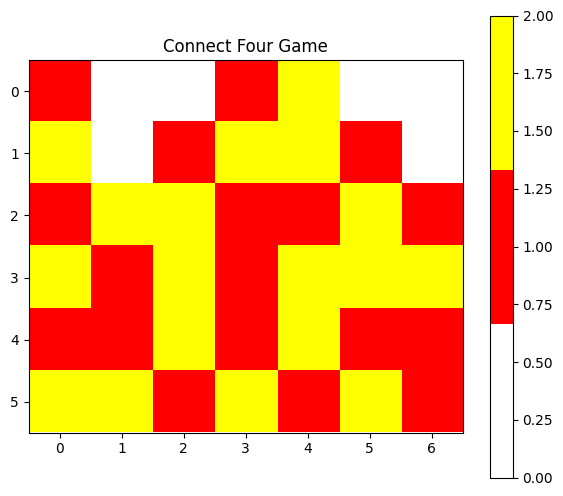


Tour du joueur 1


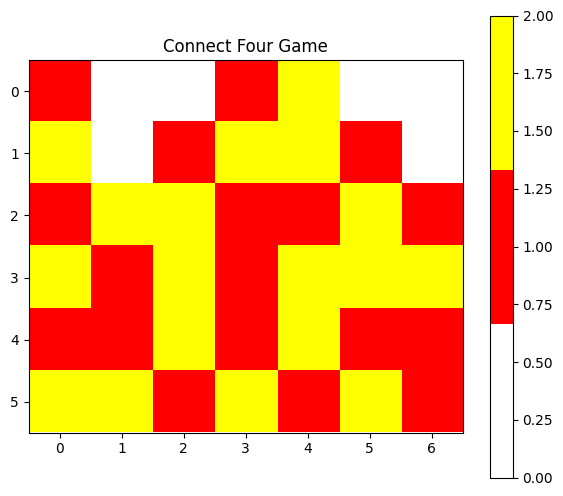

Coup joué: 1


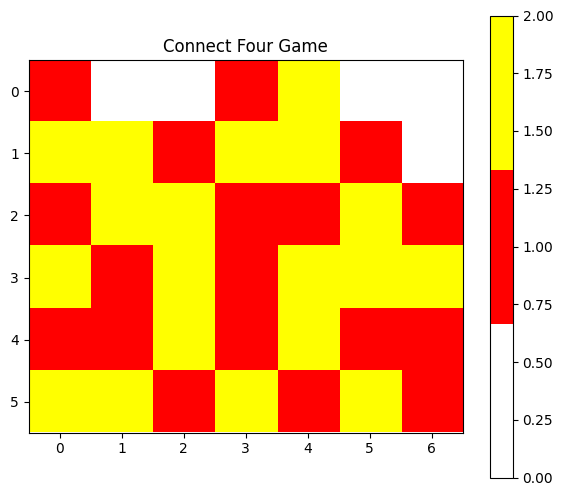


Tour du joueur 2


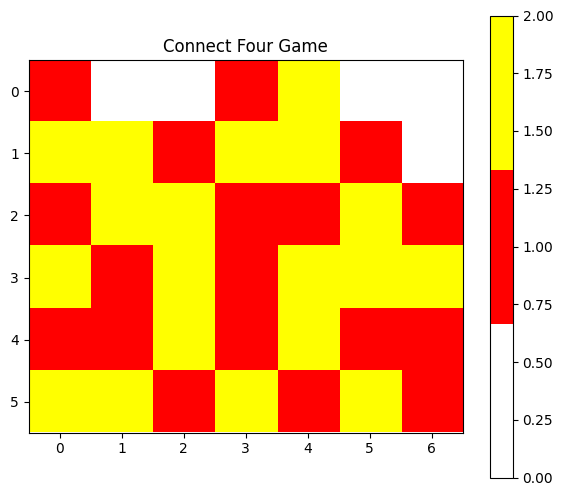

Coup joué: 2


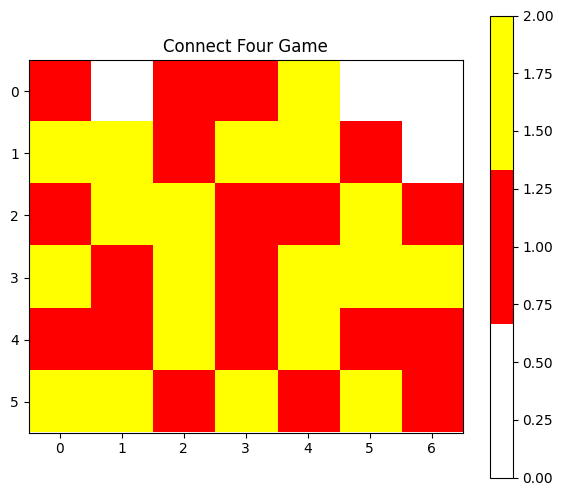


Tour du joueur 1


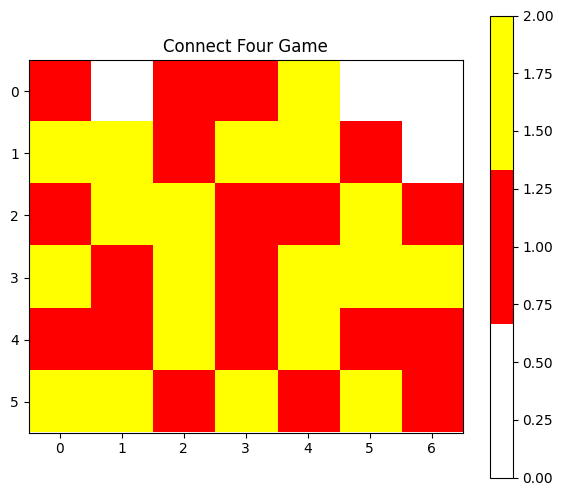

Coup joué: 1


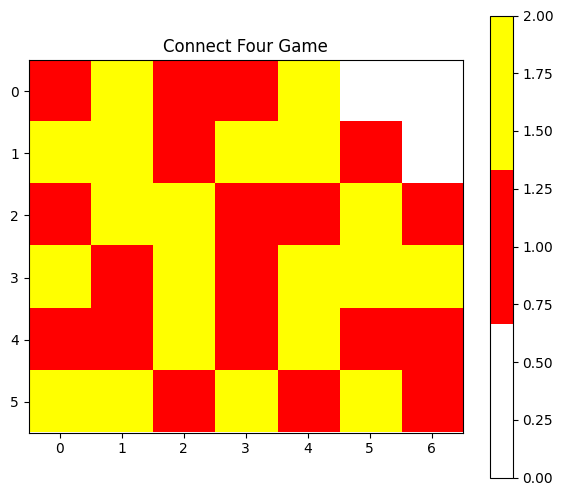


Tour du joueur 2


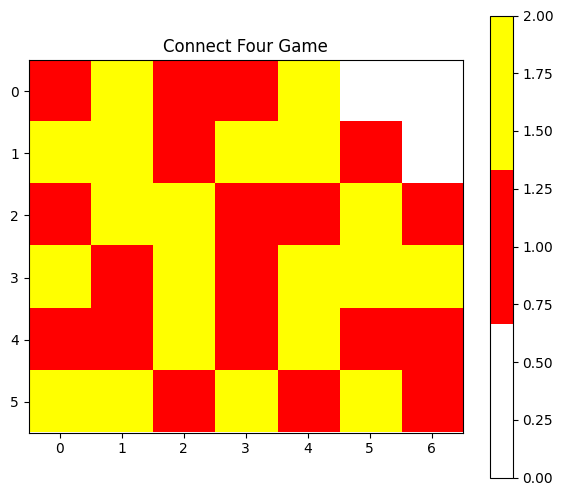

Coup joué: 5


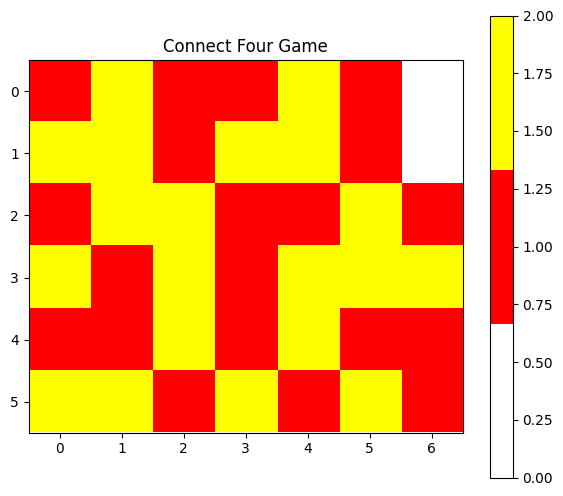


Tour du joueur 1


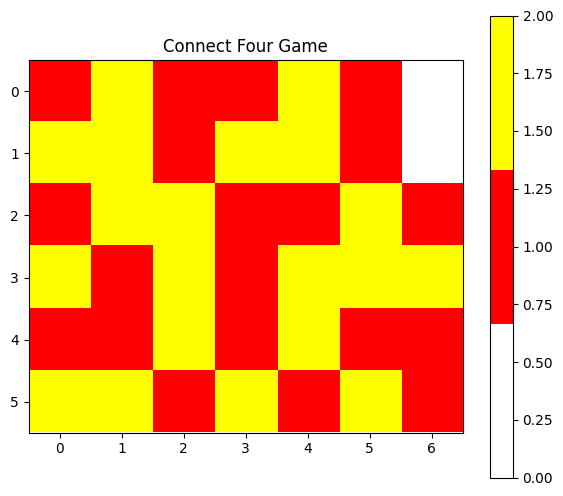

Coup joué: 6


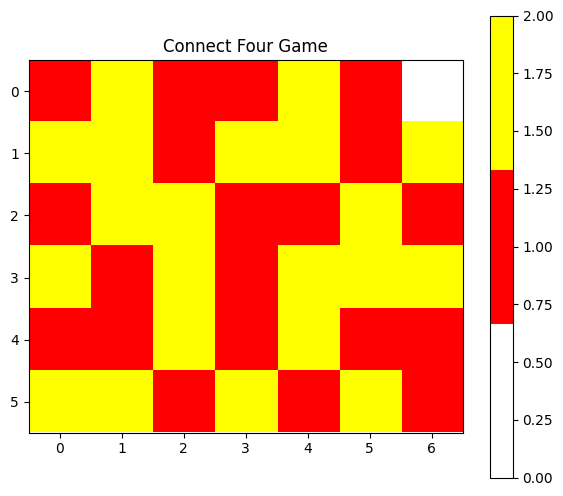


Tour du joueur 2


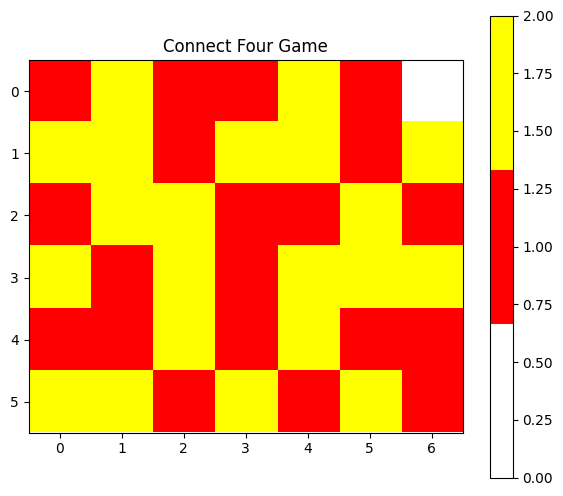

Coup joué: 6


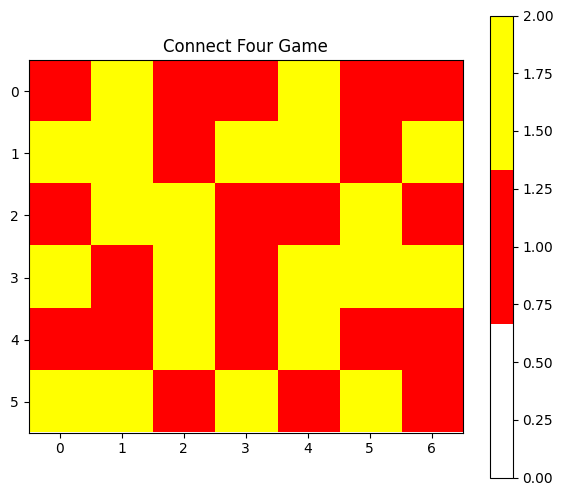

Le joueur 2 a gagné!


In [13]:
def count_windows(grid, size, mark, config):
    """Count the number of windows of a given size for a specific player."""
    count = 0
    # Check all possible windows of the given size (horizontally, vertically, diagonally)
    for r in range(config.rows):
        for c in range(config.cols):
            if c + size <= config.cols:  # Horizontal
                if np.all(grid[r, c:c+size] == mark):
                    count += 1
            if r + size <= config.rows:  # Vertical
                if np.all(grid[r:r+size, c] == mark):
                    count += 1
            if r + size <= config.rows and c + size <= config.cols:  # Diagonal \
                if np.all([grid[r+i, c+i] == mark for i in range(size)]):
                    count += 1
            if r + size <= config.rows and c - size >= -1:  # Diagonal /
                if np.all([grid[r+i, c-i] == mark for i in range(size)]):
                    count += 1
    return count

def get_heuristic_q1(grid, col, mark, config):
    """Compute a heuristic score based on different window sizes."""
    num_twos = count_windows(grid, 2, mark, config)
    num_threes = count_windows(grid, 3, mark, config)
    num_fours = count_windows(grid, 4, mark, config)
    num_twos_opp = count_windows(grid, 2, mark%2+1, config)
    num_threes_opp = count_windows(grid, 3, mark%2+1, config)

    # Define the weights for each pattern
    A = 1000000  # Weight for fours (winning move)
    B = 100      # Weight for threes (potential winning move)
    C = 10       # Weight for twos (potential move)
    D = -20      # Weight for opponent's twos (block potential)
    E = -50      # Weight for opponent's threes (block potential)

    score = A * num_fours + B * num_threes + C * num_twos + D * num_twos_opp + E * num_threes_opp
    return score

class HeuristicAgent:
    def __init__(self, player_id):
        self.player_id = player_id

    def get_action(self, env):
        valid_moves = env.get_valid_moves()
        best_score = -float('inf')
        best_move = None

        for move in valid_moves:
            row = 0
            while row < env.rows - 1 and env.board[row + 1][move] == 0:
                row += 1
            # Temporarily apply the move
            env.board[row][move] = self.player_id
            score = get_heuristic_q1(env.board, move, self.player_id, env)
            env.board[row][move] = 0  # Undo the move

            if score > best_score:
                best_score = score
                best_move = move

        return best_move

agent1 = HeuristicAgent(player_id=1)
agent2 = SmarterAgent(player_id=2)
play_game(agent1, agent2)